#### EMACS LISP STUFF PLEASE IGNORE
(defun switch-to-notebook ()
 (interactive)
 (st-toggle-to-buffer "*ein: http://127.0.0.1:8899/make_figs.ipynb*"))

In [1]:
%pylab inline
import os,sys
from importlib import reload
from collections import defaultdict
from copy import deepcopy
plt.style.use("default")
plt.rcParams["figure.figsize"] = (8,3)
from matplotlib.gridspec import GridSpec
from scipy.signal import stft
from builtins import sum as bsum

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Don't reload this, otherwise it will create a new units registry object
# and will then complain about combining different registries.
import units; UNITS = units.UNITS

In [348]:
flush = lambda *args, **kwargs: [sys.stdout.flush(), print(*args, **kwargs)]

In [351]:
import boulder;   reload(boulder)
import crick;     reload(crick)
import surrogate; reload(surrogate)
import fisher_plumes_tools as fpt;      reload(fpt)
import fisher_plumes_figs  as fpf;      reload(fpf);
import fisher_plumes_fig_tools as fpft; reload(fpft)
import fisher_plumes as fp;             reload(fp)
import utils; reload(utils); from utils import dict_update, dict_update_from_field
FisherPlumes = fp.FisherPlumes

n_bootstraps = 50
pairs_mode = "unsigned"

crick.logger.setLevel(logging.DEBUG)
force_reload = False

include_cr = False

if force_reload or ('Fbw' not in locals()):
    Fbw = FisherPlumes("boulder16", pitch = 25000 * UNITS.um,  freq_max = 20 * UNITS.hertz,
                       which_coords = [(0.45, 0.5),
                                       #(0.35,0.5),
                                       #(0.25,0.5),
                                       #(0.15,0.5)
                                       ]*UNITS.m,
                       py_mode = "relative",
                       suffix  = "manuscript",
                       pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
else:
    Fbw = FisherPlumes(Fbw)
    Fbw.n_bootstraps = n_bootstraps

if include_cr:
    if force_reload or ('Fcr' not in locals()):
        Fcr = FisherPlumes("n12dishT",  pitch = 76000 * UNITS.um, freq_max = 100 * UNITS.hertz,
                           which_coords = [(1.0, 0.5),
                                           #(0.9,0.5),
    #                                       (0.7,0.5),
                                           #(0.6,0.5)
                                           ]*UNITS.m,
                           pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
    else:
        Fcr = FisherPlumes(Fcr)
        Fcr.n_bootstraps = n_bootstraps
    
if force_reload or ('Fsu' not in locals()):
    Fsu = FisherPlumes("surr_all_equal",
                       freq_max     = 100 * UNITS.hertz,
                       pitch        = 0.025 * UNITS.m,
                       which_coords = [(1.0, 0.)]*UNITS.m,
                       n_sources    = 16,
                       pairs_mode   = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 1)    
else:
    Fsu = FisherPlumes(Fsu)
    Fsu.n_bootstraps = n_bootstraps

if force_reload or ('Fsu_high_white' not in locals()):
    Fsu_high_white = FisherPlumes("surr_high",
                       freq_max     = 100 * UNITS.hertz,
                       pitch        = 0.025 * UNITS.m,
                       which_coords = [(1.0, 0.)]*UNITS.m,
                       n_sources    = 16,
                       pairs_mode   = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 1, surrogate_k = 0)    
else:
    Fsu_high_white = FisherPlumes(Fsu_high_white)
    Fsu_high_white.n_bootstraps = n_bootstraps    

if force_reload or ('Fsu_high_pink' not in locals()):
    Fsu_high_pink = FisherPlumes("surr_high",
                       freq_max     = 100 * UNITS.hertz,
                       pitch        = 0.025 * UNITS.m,
                       which_coords = [(1.0, 0.)]*UNITS.m,
                       n_sources    = 16,
                       pairs_mode   = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 1, surrogate_k = 4)    
else:
    Fsu_high_pink = FisherPlumes(Fsu_high_pink)
    Fsu_high_pink.n_bootstraps = n_bootstraps

if force_reload or ('Fsu_high2_pink' not in locals()):
    Fsu_high2_pink = FisherPlumes("surr_high2",
                       freq_max     = 100 * UNITS.hertz,
                       pitch        = 0.025 * UNITS.m,
                       which_coords = [(1.0, 0.)]*UNITS.m,
                       n_sources    = 16,
                       pairs_mode   = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 1, surrogate_k = 4)    
else:
    Fsu_high2_pink = FisherPlumes(Fsu_high2_pink)
    Fsu_high2_pink.n_bootstraps = n_bootstraps        

INFO:boulder:Boulder simulation data available for:


INFO:boulder:Re100_0_5mm_50Hz_16source_manuscript.h5         : ['Odor Data/c1a', 'Odor Data/c1b', 'Odor Data/c2a', 'Odor Data/c2b', 'Odor Data/c3a', 'Odor Data/c3b', 'Odor Data/c4a', 'Odor Data/c4b', 'Odor Data/c5a', 'Odor Data/c5b', 'Odor Data/c6a', 'Odor Data/c6b', 'Odor Data/c7a', 'Odor Data/c7b', 'Odor Data/c8a', 'Odor Data/c8b'] (16 datasets)


INFO:crick:Simulation data available for:


INFO:crick:ff_int_sym_slow_high_tres_wide_n12dishT         : Y0.450 - Y0.550 (11 datasets)


INFO:surrogate:Surrogate simulation data available for: ['no_info', 'one_info', 'two_info', 'high', 'spike_and_slab', 'blue', 'red', 'all_equal']


           fisher_plumes 2023/05/19 18:42:51     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7f89a8980c10> is a FisherPlumes object named boulder16.


           fisher_plumes 2023/05/19 18:42:51     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field name.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field sims.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field fs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field freqs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field ss.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field cc.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field tt.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field vars_for_freqs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field rho.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field la.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field mu.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pvals.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field r2vals.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field fit_params.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field dd_fit.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field I_dists.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field I.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field Ilow.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field Ihigh.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field I_pcs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field reg_coefs.


           fisher_plumes 2023/05/19 18:42:51     INFO: Copied data fields from FisherPlumes object.


           fisher_plumes 2023/05/19 18:42:51     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7f8996c8c790> is a FisherPlumes object named surr_all_equal.


           fisher_plumes 2023/05/19 18:42:51     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field name.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field sims.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field fs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field freqs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field ss.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field cc.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field tt.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field vars_for_freqs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field rho.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field la.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field mu.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pvals.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field r2vals.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field fit_params.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field dd_fit.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field I_dists.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field I.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field Ilow.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field Ihigh.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field I_pcs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field reg_coefs.


           fisher_plumes 2023/05/19 18:42:51     INFO: Copied data fields from FisherPlumes object.


           fisher_plumes 2023/05/19 18:42:51     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7f8976619490> is a FisherPlumes object named surr_high.


           fisher_plumes 2023/05/19 18:42:51     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field name.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field sims.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field fs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field freqs.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field ss.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field cc.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field tt.


           fisher_plumes 2023/05/19 18:42:51    DEBUG: Copied field vars_for_freqs.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field rho.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field la.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field mu.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pvals.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field r2vals.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field fit_params.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field dd_fit.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field I_dists.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field I.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field Ilow.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field Ihigh.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field I_pcs.


           fisher_plumes 2023/05/19 18:42:52     INFO: Copied data fields from FisherPlumes object.


           fisher_plumes 2023/05/19 18:42:52     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7f899729ea90> is a FisherPlumes object named surr_high.


           fisher_plumes 2023/05/19 18:42:52     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field name.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field sims.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field fs.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field freqs.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field ss.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field cc.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field tt.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field vars_for_freqs.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field rho.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field la.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field mu.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pvals.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field r2vals.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field fit_params.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field dd_fit.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field I_dists.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field I.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field Ilow.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field Ihigh.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field I_pcs.


           fisher_plumes 2023/05/19 18:42:52     INFO: Copied data fields from FisherPlumes object.


           fisher_plumes 2023/05/19 18:42:52     INFO: sim_name=<fisher_plumes.FisherPlumes object at 0x7f89765a2a60> is a FisherPlumes object named surr_high2.


           fisher_plumes 2023/05/19 18:42:52     INFO: Attempting to copy data fields.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field name.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pitch.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pitch_string.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field sims.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pairs_um.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field n_bootstraps.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field random_seed.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field yvals_um.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pairs_mode.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field wnd.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field freq_max.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field sim0.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field fs.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field dimensions.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field freqs.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field ss.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field cc.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field tt.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field vars_for_freqs.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field rho.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field la.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field mu.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field pvals.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field r2vals.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field fit_params.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field dd_fit.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field I_dists.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field I.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field Ilow.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field Ihigh.


           fisher_plumes 2023/05/19 18:42:52    DEBUG: Copied field I_pcs.


           fisher_plumes 2023/05/19 18:42:52     INFO: Copied data fields from FisherPlumes object.


In [343]:
if include_cr:
    data ={
        "cr":Fcr,
    }
else:
    data = {
        "bw":Fbw,
        "su":Fsu,
        "su_high_white":Fsu_high_white,
        "su_high_pink":Fsu_high_pink,
        "su_high2_pink":Fsu_high2_pink,
}

### Set the desired window size(s) for the analysis

In [206]:
wnd_sec_vals = defaultdict(lambda: [1 * UNITS.s],
                           {"su":[1 * UNITS.s, 5 * UNITS.s, 10 * UNITS.s],
                            "su_high_pink":[ 1 * UNITS.s, 2 * UNITS.s, 4 * UNITS.s, 5*UNITS.s, 6  * UNITS.s, 8 * UNITS.s, 10 * UNITS.s],
                            "su_high2_pink":[ 1 * UNITS.s, 2 * UNITS.s, 4 * UNITS.s, 5 * UNITS.s, 6  * UNITS.s, 8 * UNITS.s, 10 * UNITS.s],
                            "bw":[1 * UNITS.s, 2 * UNITS.s, 4 * UNITS.s, 5 * UNITS.s, 6  * UNITS.s, 8 * UNITS.s, 10 * UNITS.s],                           
                            "cr":[1 * UNITS.s, 2 * UNITS.s, 4 * UNITS.s, 10 * UNITS.s],
                           })

wnd_shapes = defaultdict(lambda: [('boxcar')],
                         {"su":[('boxcar'), ('hann')],
                          "su_high_pink": [('boxcar'), ('hann')],
                          "su_high2_pink":[('boxcar'), ('hann')],
                          "cr":[('boxcar'), ('hann')],
                          "bw":[('boxcar'), ('hann')],
                          })

### Compute the metrics for the specified window sizes

In [207]:
reload(fpt)
reload(fpf)

<module 'fisher_plumes_figs' from '/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py'>

In [208]:
dmax_um  = {"bw":np.inf, "cr":np.inf}
dmax_um  = dict_update(dmax_um, ["su", "su_high_white", "su_high_pink", "su_high2_pink"], [np.inf]*4)

recompute    = ["su_high2_pink"]
recompute_ds = lambda ds: (recompute == True) or (type(recompute)==list and ds in recompute)

if recompute == True or ('proc' not in locals()): proc = {}

for k, F in data.items():
    istart = 0 if k != "cr" else 1000
    if k not in proc:
        proc[k] = {}
    for iwnd, wnd_sec in enumerate(wnd_sec_vals[k]):        
        wnd = int(F.fs*wnd_sec)
        for iwnd_shape, wnd_shape in enumerate(wnd_shapes[k]):
            txt = f"Running {k} for {wnd_sec=:}, {wnd=:} {wnd_shape=:}"
            print(f"{txt:<70}", end = "")
            sys.stdout.flush()

            wnd_key = (wnd_sec, wnd_shape)
            
            if (wnd_key in proc[k]):# and not recompute_ds(k):
                print(f"  Data for {wnd_key=:} already present.")
                continue
    
            # We've run for a previous window,
            # copy the object to run again with a
            # different window.
            if iwnd or iwnd_shape: F = deepcopy(F)
    
            F.compute_all_for_window(wnd      = wnd,
                                     window   = wnd_shape,
                                     istart   = istart,
                                     dmax_um  = dmax_um[k],
                                     fit_vars = False,
            )
            
            proc[k][wnd_key] = F

Running bw for wnd_sec=1 s, wnd=50 wnd_shape=boxcar                   

  Data for wnd_key=(<Quantity(1, 'second')>, 'boxcar') already present.
Running bw for wnd_sec=1 s, wnd=50 wnd_shape=hann                     

  Data for wnd_key=(<Quantity(1, 'second')>, 'hann') already present.
Running bw for wnd_sec=2 s, wnd=100 wnd_shape=boxcar                  

  Data for wnd_key=(<Quantity(2, 'second')>, 'boxcar') already present.
Running bw for wnd_sec=2 s, wnd=100 wnd_shape=hann                    

  Data for wnd_key=(<Quantity(2, 'second')>, 'hann') already present.
Running bw for wnd_sec=4 s, wnd=200 wnd_shape=boxcar                  

  Data for wnd_key=(<Quantity(4, 'second')>, 'boxcar') already present.
Running bw for wnd_sec=4 s, wnd=200 wnd_shape=hann                    

  Data for wnd_key=(<Quantity(4, 'second')>, 'hann') already present.
Running bw for wnd_sec=5 s, wnd=250 wnd_shape=boxcar                  

  Data for wnd_key=(<Quantity(5, 'second')>, 'boxcar') already present.
Running bw for wnd_sec=5 s, wnd=250 wnd_shape=hann                    

  Data for wnd_key=(<Quantity(5, 'second')>, 'hann') already present.
Running bw for wnd_sec=6 s, wnd=300 wnd_shape=boxcar                  

  Data for wnd_key=(<Quantity(6, 'second')>, 'boxcar') already present.
Running bw for wnd_sec=6 s, wnd=300 wnd_shape=hann                    

  Data for wnd_key=(<Quantity(6, 'second')>, 'hann') already present.
Running bw for wnd_sec=8 s, wnd=400 wnd_shape=boxcar                  

  Data for wnd_key=(<Quantity(8, 'second')>, 'boxcar') already present.
Running bw for wnd_sec=8 s, wnd=400 wnd_shape=hann                    

  Data for wnd_key=(<Quantity(8, 'second')>, 'hann') already present.
Running bw for wnd_sec=10 s, wnd=500 wnd_shape=boxcar                 

  Data for wnd_key=(<Quantity(10, 'second')>, 'boxcar') already present.
Running bw for wnd_sec=10 s, wnd=500 wnd_shape=hann                   

  Data for wnd_key=(<Quantity(10, 'second')>, 'hann') already present.
Running su for wnd_sec=1 s, wnd=50 wnd_shape=boxcar                   

  Data for wnd_key=(<Quantity(1, 'second')>, 'boxcar') already present.
Running su for wnd_sec=1 s, wnd=50 wnd_shape=hann                     

           fisher_plumes 2023/05/19 15:27:59     INFO: Window set to self.wnd=50.


           fisher_plumes 2023/05/19 15:27:59     INFO: Computing trig coefficients for surr_all_equal with istart=0 and window='hann' and kwargs={}


           fisher_plumes 2023/05/19 15:27:59     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/19 15:27:59     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/19 15:27:59     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/19 15:28:00     INFO: Computing lambdas.


           fisher_plumes 2023/05/19 15:28:00    DEBUG: sum(freqs<=fmax)=26.


           fisher_plumes 2023/05/19 15:28:00    DEBUG: data.shape=(51, 2, 3808)


           fisher_plumes 2023/05/19 15:28:00    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/19 15:28:02    DEBUG: utils.d1(self.la[0]).shape=(51, 26)


           fisher_plumes 2023/05/19 15:28:02     INFO: Computing p-values.


           fisher_plumes 2023/05/19 15:28:02     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:28:03     INFO: Computing R^2-values.


           fisher_plumes 2023/05/19 15:28:03     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:28:03     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/19 15:28:03     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/19 15:28:03     INFO: Computed λ for 26 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/19 15:28:03     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/19 15:28:06    DEBUG: self.fit_params[0].shape=(51, 26, 3).


           fisher_plumes 2023/05/19 15:28:06    DEBUG: self.vars_for_freqs[0].shape=(51, 26).


           fisher_plumes 2023/05/19 15:28:06     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/19 15:28:06     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/19 15:28:06    DEBUG: self.I[0].shape=(51, 26, 21) has the expected value.


           fisher_plumes 2023/05/19 15:28:06     INFO: Done computing all for wnd=50.


Running su for wnd_sec=5 s, wnd=250 wnd_shape=boxcar                  

           fisher_plumes 2023/05/19 15:28:06     INFO: Window set to self.wnd=250.


           fisher_plumes 2023/05/19 15:28:06     INFO: Computing trig coefficients for surr_all_equal with istart=0 and window='boxcar' and kwargs={}


           fisher_plumes 2023/05/19 15:28:06     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/19 15:28:06     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/19 15:28:06     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/19 15:28:06     INFO: Computing lambdas.


           fisher_plumes 2023/05/19 15:28:06    DEBUG: sum(freqs<=fmax)=126.


           fisher_plumes 2023/05/19 15:28:06    DEBUG: data.shape=(51, 2, 736)


           fisher_plumes 2023/05/19 15:28:06    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/19 15:28:10    DEBUG: utils.d1(self.la[0]).shape=(51, 126)


           fisher_plumes 2023/05/19 15:28:10     INFO: Computing p-values.


           fisher_plumes 2023/05/19 15:28:10     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:28:12     INFO: Computing R^2-values.


           fisher_plumes 2023/05/19 15:28:12     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:28:12     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/19 15:28:12     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/19 15:28:12     INFO: Computed λ for 126 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/19 15:28:12     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/19 15:28:24    DEBUG: self.fit_params[0].shape=(51, 126, 3).


           fisher_plumes 2023/05/19 15:28:24    DEBUG: self.vars_for_freqs[0].shape=(51, 126).


           fisher_plumes 2023/05/19 15:28:24     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/19 15:28:24     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/19 15:28:24    DEBUG: self.I[0].shape=(51, 126, 21) has the expected value.


           fisher_plumes 2023/05/19 15:28:24     INFO: Done computing all for wnd=250.


Running su for wnd_sec=5 s, wnd=250 wnd_shape=hann                    

           fisher_plumes 2023/05/19 15:28:24     INFO: Window set to self.wnd=250.


           fisher_plumes 2023/05/19 15:28:24     INFO: Computing trig coefficients for surr_all_equal with istart=0 and window='hann' and kwargs={}


           fisher_plumes 2023/05/19 15:28:24     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/19 15:28:24     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/19 15:28:24     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/19 15:28:25     INFO: Computing lambdas.


           fisher_plumes 2023/05/19 15:28:25    DEBUG: sum(freqs<=fmax)=126.


           fisher_plumes 2023/05/19 15:28:25    DEBUG: data.shape=(51, 2, 736)


           fisher_plumes 2023/05/19 15:28:25    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/19 15:28:29    DEBUG: utils.d1(self.la[0]).shape=(51, 126)


           fisher_plumes 2023/05/19 15:28:29     INFO: Computing p-values.


           fisher_plumes 2023/05/19 15:28:29     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:28:30     INFO: Computing R^2-values.


           fisher_plumes 2023/05/19 15:28:30     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:28:31     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/19 15:28:31     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/19 15:28:31     INFO: Computed λ for 126 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/19 15:28:31     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/19 15:28:42    DEBUG: self.fit_params[0].shape=(51, 126, 3).


           fisher_plumes 2023/05/19 15:28:42    DEBUG: self.vars_for_freqs[0].shape=(51, 126).


           fisher_plumes 2023/05/19 15:28:42     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/19 15:28:42     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/19 15:28:42    DEBUG: self.I[0].shape=(51, 126, 21) has the expected value.


           fisher_plumes 2023/05/19 15:28:42     INFO: Done computing all for wnd=250.


Running su for wnd_sec=10 s, wnd=500 wnd_shape=boxcar                 

           fisher_plumes 2023/05/19 15:28:42     INFO: Window set to self.wnd=500.


           fisher_plumes 2023/05/19 15:28:42     INFO: Computing trig coefficients for surr_all_equal with istart=0 and window='boxcar' and kwargs={}


           fisher_plumes 2023/05/19 15:28:42     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/19 15:28:43     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/19 15:28:43     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/19 15:28:43     INFO: Computing lambdas.


           fisher_plumes 2023/05/19 15:28:43    DEBUG: sum(freqs<=fmax)=251.


           fisher_plumes 2023/05/19 15:28:43    DEBUG: data.shape=(51, 2, 352)


           fisher_plumes 2023/05/19 15:28:43    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/19 15:28:49    DEBUG: utils.d1(self.la[0]).shape=(51, 251)


           fisher_plumes 2023/05/19 15:28:49     INFO: Computing p-values.


           fisher_plumes 2023/05/19 15:28:49     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:28:53     INFO: Computing R^2-values.


           fisher_plumes 2023/05/19 15:28:53     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:28:53     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/19 15:28:53     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/19 15:28:53     INFO: Computed λ for 251 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/19 15:28:53     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/19 15:29:19    DEBUG: self.fit_params[0].shape=(51, 251, 3).


           fisher_plumes 2023/05/19 15:29:19    DEBUG: self.vars_for_freqs[0].shape=(51, 251).


           fisher_plumes 2023/05/19 15:29:19     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/19 15:29:19     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/19 15:29:19    DEBUG: self.I[0].shape=(51, 251, 21) has the expected value.


           fisher_plumes 2023/05/19 15:29:19     INFO: Done computing all for wnd=500.


Running su for wnd_sec=10 s, wnd=500 wnd_shape=hann                   

           fisher_plumes 2023/05/19 15:29:19     INFO: Window set to self.wnd=500.


           fisher_plumes 2023/05/19 15:29:19     INFO: Computing trig coefficients for surr_all_equal with istart=0 and window='hann' and kwargs={}


           fisher_plumes 2023/05/19 15:29:19     INFO: Computing coefficients for 1 probes.


           fisher_plumes 2023/05/19 15:29:20     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/19 15:29:20     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/19 15:29:20     INFO: Computing lambdas.


           fisher_plumes 2023/05/19 15:29:20    DEBUG: sum(freqs<=fmax)=251.


           fisher_plumes 2023/05/19 15:29:20    DEBUG: data.shape=(51, 2, 352)


           fisher_plumes 2023/05/19 15:29:20    DEBUG: vars.shape=(2, 51)


           fisher_plumes 2023/05/19 15:29:26    DEBUG: utils.d1(self.la[0]).shape=(51, 251)


           fisher_plumes 2023/05/19 15:29:26     INFO: Computing p-values.


           fisher_plumes 2023/05/19 15:29:26     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:29:30     INFO: Computing R^2-values.


           fisher_plumes 2023/05/19 15:29:30     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/19 15:29:30     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/19 15:29:30     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/19 15:29:30     INFO: Computed λ for 251 frequencies and 16 distances and 51 bootstraps.


           fisher_plumes 2023/05/19 15:29:30     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/19 15:29:52    DEBUG: self.fit_params[0].shape=(51, 251, 3).


           fisher_plumes 2023/05/19 15:29:52    DEBUG: self.vars_for_freqs[0].shape=(51, 251).


           fisher_plumes 2023/05/19 15:29:52     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/19 15:29:52     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/19 15:29:52    DEBUG: self.I[0].shape=(51, 251, 21) has the expected value.


           fisher_plumes 2023/05/19 15:29:52     INFO: Done computing all for wnd=500.


Running su_high_white for wnd_sec=1 s, wnd=50 wnd_shape=boxcar        

  Data for wnd_key=(<Quantity(1, 'second')>, 'boxcar') already present.
Running su_high_pink for wnd_sec=1 s, wnd=50 wnd_shape=boxcar         

  Data for wnd_key=(<Quantity(1, 'second')>, 'boxcar') already present.
Running su_high_pink for wnd_sec=1 s, wnd=50 wnd_shape=hann           

  Data for wnd_key=(<Quantity(1, 'second')>, 'hann') already present.
Running su_high_pink for wnd_sec=2 s, wnd=100 wnd_shape=boxcar        

  Data for wnd_key=(<Quantity(2, 'second')>, 'boxcar') already present.
Running su_high_pink for wnd_sec=2 s, wnd=100 wnd_shape=hann          

  Data for wnd_key=(<Quantity(2, 'second')>, 'hann') already present.
Running su_high_pink for wnd_sec=4 s, wnd=200 wnd_shape=boxcar        

  Data for wnd_key=(<Quantity(4, 'second')>, 'boxcar') already present.
Running su_high_pink for wnd_sec=4 s, wnd=200 wnd_shape=hann          

  Data for wnd_key=(<Quantity(4, 'second')>, 'hann') already present.
Running su_high_pink for wnd_sec=5 s, wnd=250 wnd_shape=boxcar        

  Data for wnd_key=(<Quantity(5, 'second')>, 'boxcar') already present.
Running su_high_pink for wnd_sec=5 s, wnd=250 wnd_shape=hann          

  Data for wnd_key=(<Quantity(5, 'second')>, 'hann') already present.
Running su_high_pink for wnd_sec=6 s, wnd=300 wnd_shape=boxcar        

  Data for wnd_key=(<Quantity(6, 'second')>, 'boxcar') already present.
Running su_high_pink for wnd_sec=6 s, wnd=300 wnd_shape=hann          

  Data for wnd_key=(<Quantity(6, 'second')>, 'hann') already present.
Running su_high_pink for wnd_sec=8 s, wnd=400 wnd_shape=boxcar        

  Data for wnd_key=(<Quantity(8, 'second')>, 'boxcar') already present.
Running su_high_pink for wnd_sec=8 s, wnd=400 wnd_shape=hann          

  Data for wnd_key=(<Quantity(8, 'second')>, 'hann') already present.
Running su_high_pink for wnd_sec=10 s, wnd=500 wnd_shape=boxcar       

  Data for wnd_key=(<Quantity(10, 'second')>, 'boxcar') already present.
Running su_high_pink for wnd_sec=10 s, wnd=500 wnd_shape=hann         

  Data for wnd_key=(<Quantity(10, 'second')>, 'hann') already present.
Running su_high2_pink for wnd_sec=1 s, wnd=50 wnd_shape=boxcar        

  Data for wnd_key=(<Quantity(1, 'second')>, 'boxcar') already present.
Running su_high2_pink for wnd_sec=1 s, wnd=50 wnd_shape=hann          

  Data for wnd_key=(<Quantity(1, 'second')>, 'hann') already present.
Running su_high2_pink for wnd_sec=2 s, wnd=100 wnd_shape=boxcar       

  Data for wnd_key=(<Quantity(2, 'second')>, 'boxcar') already present.
Running su_high2_pink for wnd_sec=2 s, wnd=100 wnd_shape=hann         

  Data for wnd_key=(<Quantity(2, 'second')>, 'hann') already present.
Running su_high2_pink for wnd_sec=4 s, wnd=200 wnd_shape=boxcar       

  Data for wnd_key=(<Quantity(4, 'second')>, 'boxcar') already present.
Running su_high2_pink for wnd_sec=4 s, wnd=200 wnd_shape=hann         

  Data for wnd_key=(<Quantity(4, 'second')>, 'hann') already present.
Running su_high2_pink for wnd_sec=5 s, wnd=250 wnd_shape=boxcar       

  Data for wnd_key=(<Quantity(5, 'second')>, 'boxcar') already present.
Running su_high2_pink for wnd_sec=5 s, wnd=250 wnd_shape=hann         

  Data for wnd_key=(<Quantity(5, 'second')>, 'hann') already present.
Running su_high2_pink for wnd_sec=6 s, wnd=300 wnd_shape=boxcar       

  Data for wnd_key=(<Quantity(6, 'second')>, 'boxcar') already present.
Running su_high2_pink for wnd_sec=6 s, wnd=300 wnd_shape=hann         

  Data for wnd_key=(<Quantity(6, 'second')>, 'hann') already present.
Running su_high2_pink for wnd_sec=8 s, wnd=400 wnd_shape=boxcar       

  Data for wnd_key=(<Quantity(8, 'second')>, 'boxcar') already present.
Running su_high2_pink for wnd_sec=8 s, wnd=400 wnd_shape=hann         

  Data for wnd_key=(<Quantity(8, 'second')>, 'hann') already present.
Running su_high2_pink for wnd_sec=10 s, wnd=500 wnd_shape=boxcar      

  Data for wnd_key=(<Quantity(10, 'second')>, 'boxcar') already present.
Running su_high2_pink for wnd_sec=10 s, wnd=500 wnd_shape=hann        

  Data for wnd_key=(<Quantity(10, 'second')>, 'hann') already present.


### Plot regression series

In [367]:
len(pc[0])

21

In [366]:
len(F.I_dists)

21

In [361]:
F.reg_coefs[iprb].shape

(51, 21, 2)

In [368]:
F.I_dists.shape

(21,)

In [370]:
pc[-1].shape

(21,)

In [373]:
F.pitch.to(UNITS.um).magnitude

25000.0

In [379]:
pc

array([[ 2.31342931e-02,  2.05807499e-02,  1.77471856e-02,
         1.10513286e-02, -3.79936575e-03, -5.84598684e-02,
        -1.05112968e-01, -2.23611698e-01, -3.57336942e-01,
        -4.90552540e-01, -6.22711428e-01, -6.75892029e-01,
        -7.98210849e-01, -9.20806564e-01, -8.91219356e-01,
        -9.92685463e-01, -9.09578857e-01, -9.95453019e-01,
        -1.01205110e+00, -9.58246210e-01, -8.62489085e-01],
       [ 3.03928381e-02,  2.74871178e-02,  2.30353445e-02,
         1.90071496e-02,  1.33780132e-02,  5.09884858e-03,
        -9.51269592e-04, -1.68919976e-02, -3.84860320e-02,
        -5.98757929e-02, -7.93740978e-02, -1.06865344e-01,
        -1.27200006e-01, -1.47162392e-01, -1.64974941e-01,
        -1.82299051e-01, -1.83644156e-01, -1.99617686e-01,
        -2.15245796e-01, -2.30541682e-01, -2.45518135e-01],
       [ 4.51805787e-02,  3.81546445e-02,  2.96563493e-02,
         2.35856890e-02,  1.86509517e-02,  1.03362906e-02,
         5.78818106e-03, -1.26520838e-03, -6.55838738e

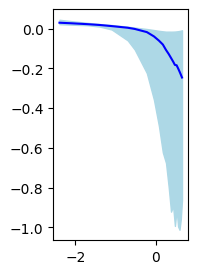

In [380]:
F = proc["bw"][(5 * UNITS.s, "hann")]
which_idists = [5,10,15]
n_subplots = len(which_idists) + 1
figure(figsize=(8,3))
subplot(1,n_subplots,n_subplots)
pc = percentile(F.reg_coefs[iprb][1:][:,:,-1],[5,50,95],axis=0)
dd = log10(F.I_dists/F.pitch.to(UNITS.um).magnitude)
fill_between(dd, pc[0], pc[2],color="lightblue")
plot(dd, pc[1], color="blue")

### Plot window series

In [219]:
I = {}
fr = {}
for wnd_type in ["boxcar","hann"]:
    for ds in ["bw","su"]:
        k = sorted([k for k in proc[ds].keys() if k[1] == wnd_type])
        I[ds,wnd_type] = {ki:proc[ds][ki].I[0][0] for ki in k}
        fr[ds, wnd_type] = {ki:proc[ds][ki].freqs for ki in k}

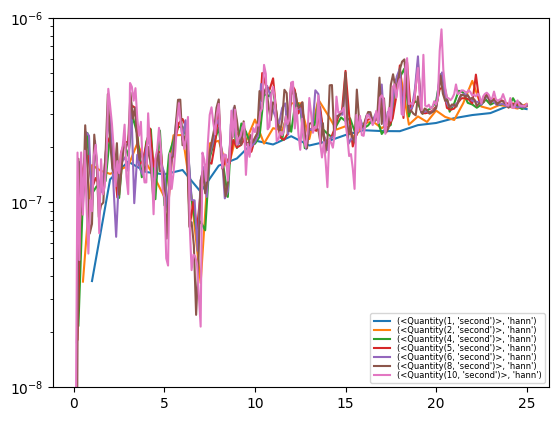

In [230]:
wnd_type = "hann"
ds = "bw"
k = sorted([k for k in proc[ds].keys() if k[1] == wnd_type])    
for ki in k:
    Ii = I[ds, wnd_type][ki]
    fi = fr[ds, wnd_type][ki]
    xx = fi[1:Ii.shape[0]].to(UNITS.Hz).magnitude
    yy = log10(Ii[1:,1])
    semilogy(fi[1:Ii.shape[0]], Ii[1:,1], label = ki)
ylim(1e-8,1e-6)
legend(fontsize=6,labelspacing=0)    

# Plot window series

/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:652: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(I[ind_use]),


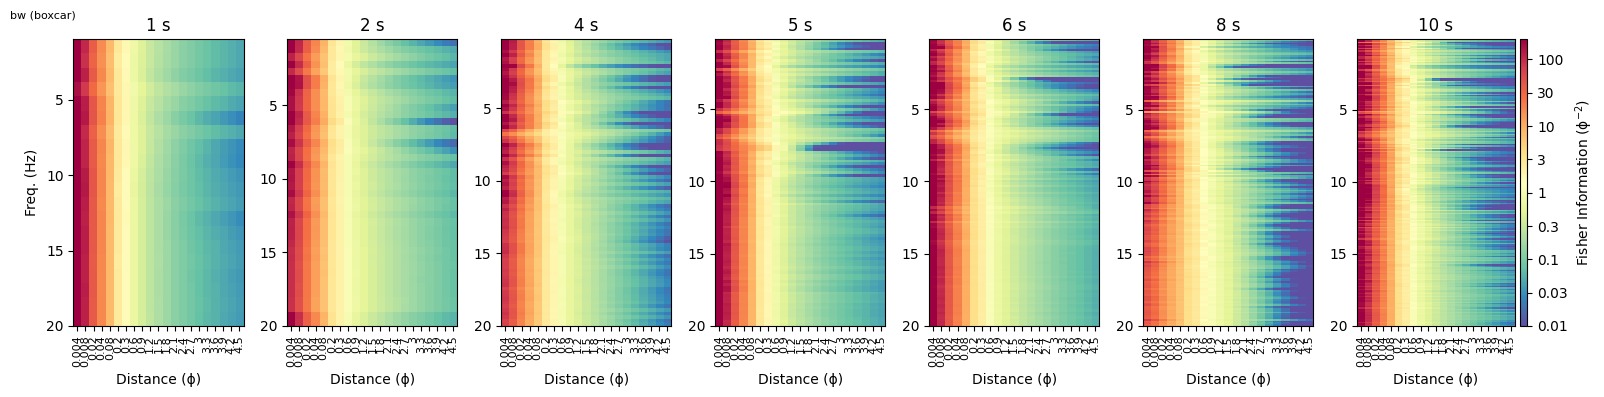

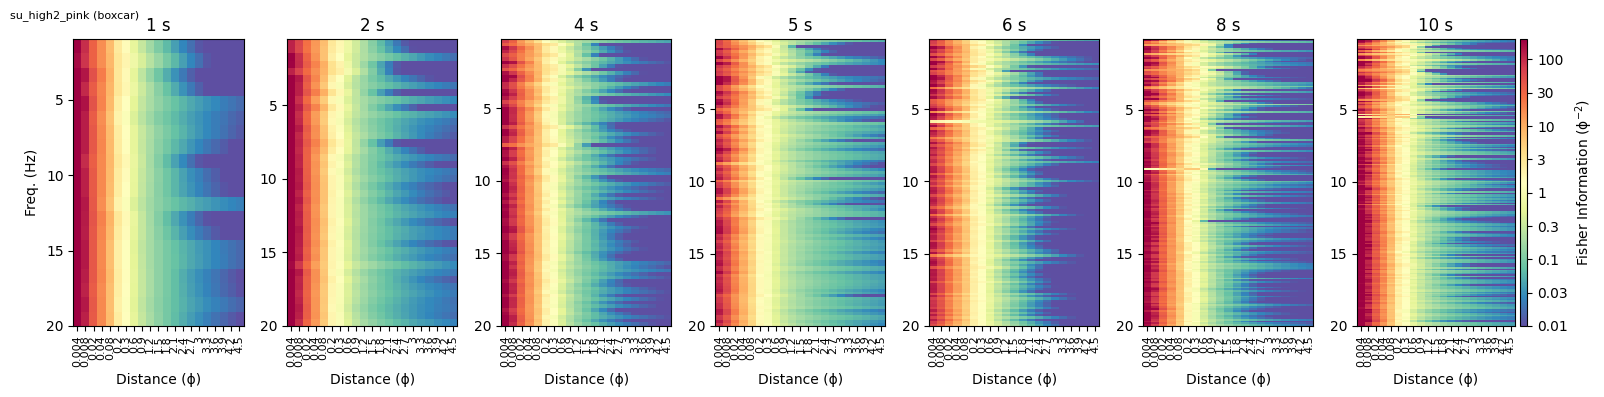

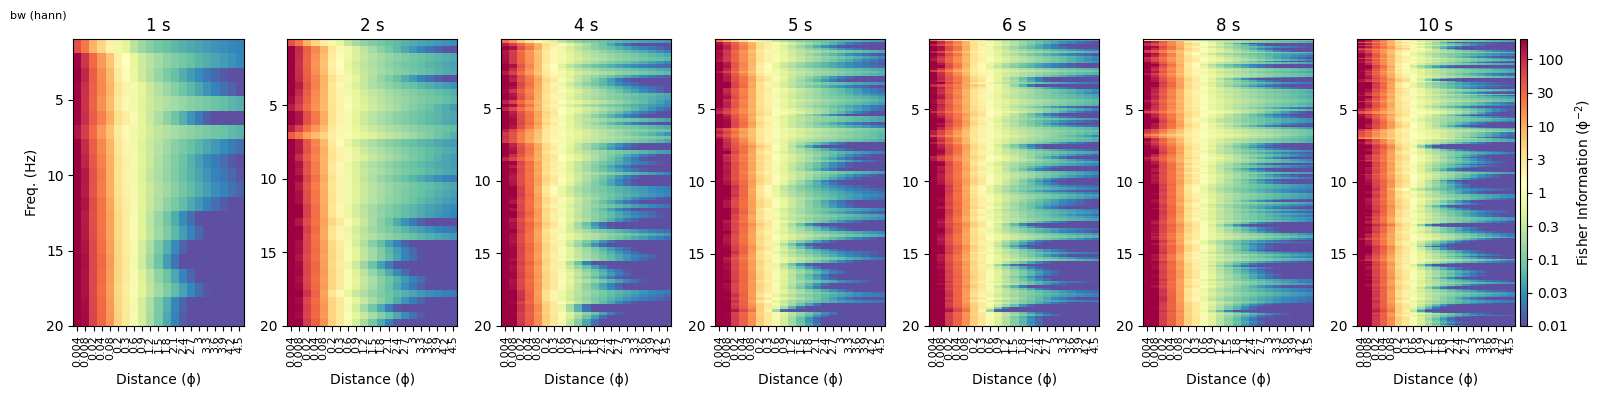

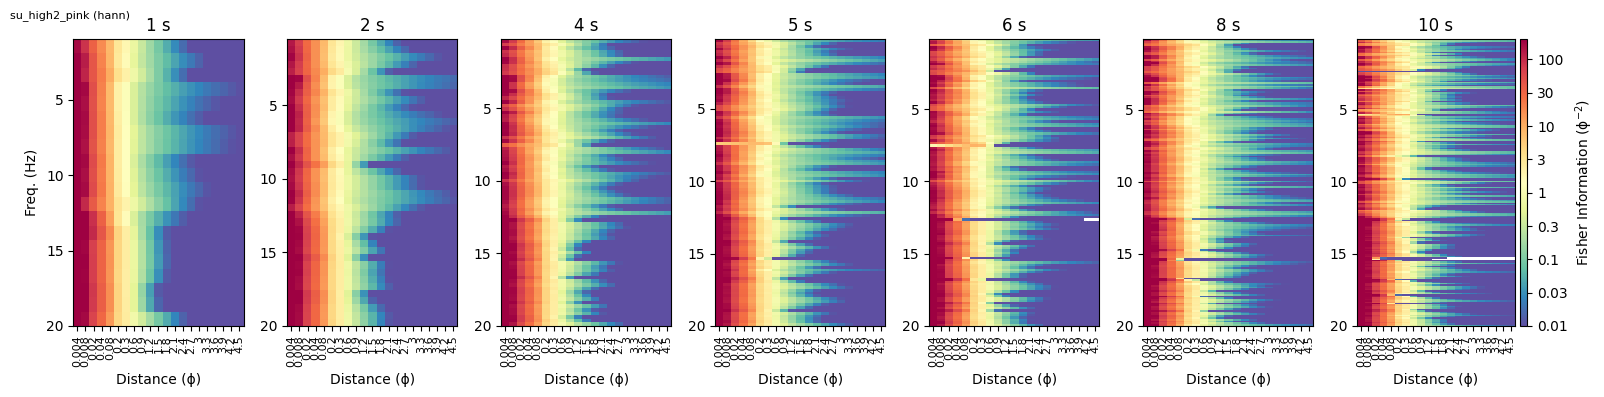

In [136]:
reload(fpf)
for wnd_type in ["boxcar","hann"]:
    for ds in ["bw","su_high2_pink"]:
        fpf.plot_window_series(proc[ds], wnd_type, heatmap_cm = cm.Spectral_r, heatmap_range = [-2, log10(200)], freq_max = 20 * UNITS.Hz, n_rows = 1, figsize = (16,4))
        suptitle(f"{ds} ({wnd_type})", x=0.0, horizontalalignment="left", fontsize=8)
    

In [106]:
?suptitle

### Set the time window of data that we want to plot

In [201]:
wnd2str = lambda wnd_t,wnd_sh: "_".join([
    f"wnd_{wnd_t.to(UNITS.s).magnitude:g}sec", f"{wnd_sh[0] if type(wnd_sh) is tuple else wnd_sh}"] + ([str(wnd_sh[1])] if type(wnd_sh) is tuple else []))

In [202]:
wnd_sec = 10 * UNITS.sec
wnd_shp = ('boxcar')
wnd_key = (wnd_sec, wnd_shp)
data_wnd = {k:v[wnd_key] for k,v in proc.items() if wnd_key in v and k != "su_high_pink"}
wnd_str = wnd2str(*wnd_key)
print(f"{len(data_wnd)} processed datasets found for {wnd_key=}\n{wnd_str=}")
print(list(data_wnd.keys()))

2 processed datasets found for wnd_key=(<Quantity(10, 'second')>, 'boxcar')
wnd_str='wnd_10sec_boxcar'
['bw', 'su_high2_pink']


### Whether to save the plots we make and where to put them

In [198]:
SAVEPLOTS = True # Whether to actually make the plots
fig_dir_fun = lambda wnd_str: f"figs/{wnd_str}"
fig_dir = fig_dir_fun(wnd_str)
if not os.path.exists(fig_dir):
    print(f"Creating {fig_dir=}")
    os.mkdir(fig_dir)
else:
    print(f"{fig_dir=} already exists.")

fig_dir='figs/wnd_1e+01sec_boxcar' already exists.


# Figure showing an example plume and correlations

In [84]:
DEFAULT   = "default"
isdefault = lambda x: type(x) is str and x == DEFAULT

su_ds = [k for k in data if k.startswith("su")]
print(f"Surrogate datasets = {su_ds}.")

which_srcs   = dict_update_from_field({"bw":[-3750, 3750],        "cr":[490000,510000]},        su_ds, "bw")        
t_wnd        = dict_update_from_field({"bw":[-4,4]*UNITS.sec,     "cr":[-0.5, 0.5]*UNITS.sec}, su_ds, "bw")
which_idists = dict_update_from_field({"bw":[0,2,3],              "cr":[0,10,20]},             su_ds, "bw")
tticks       = dict_update_from_field({"bw":DEFAULT,              "cr":[39.5,40,40.5]},        su_ds, "bw")
xticks       = dict_update_from_field({"bw":DEFAULT,              "cr":DEFAULT},               su_ds, "bw")
yticks       = dict_update_from_field({"bw":DEFAULT,              "cr":DEFAULT},               su_ds, "bw")

Surrogate datasets = ['su', 'su_high_white', 'su_high2_pink'].


INFO:boulder:Loading fld='c1a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1a_t40.p'.


INFO:boulder:Loading fld='c1b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1b_t40.p'.


INFO:boulder:Loading fld='c2a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2a_t40.p'.


INFO:boulder:Loading fld='c2b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2b_t40.p'.


INFO:boulder:Loading fld='c3a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3a_t40.p'.


INFO:boulder:Loading fld='c3b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3b_t40.p'.


INFO:boulder:Loading fld='c4a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4a_t40.p'.


INFO:boulder:Loading fld='c4b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4b_t40.p'.


INFO:boulder:Loading fld='c5a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5a_t40.p'.


INFO:boulder:Loading fld='c5b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5b_t40.p'.


INFO:boulder:Loading fld='c6a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6a_t40.p'.


INFO:boulder:Loading fld='c6b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6b_t40.p'.


INFO:boulder:Loading fld='c7a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7a_t40.p'.


INFO:boulder:Loading fld='c7b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7b_t40.p'.


INFO:boulder:Loading fld='c8a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8a_t40.p'.


INFO:boulder:Loading fld='c8b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8b_t40.p'.


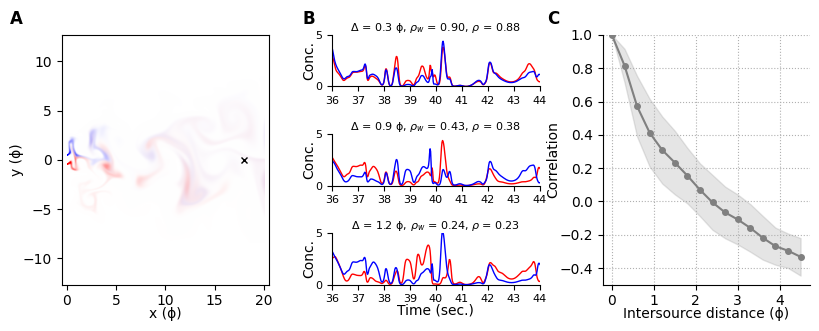

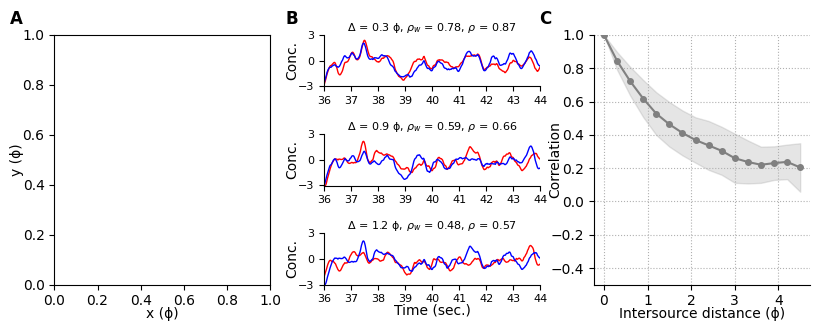

In [85]:
reload(fpf)
reload(fpft)

for k, F in sorted(data_wnd.items()):
    data_dir = os.path.join(os.environ["FISHER_PLUMES_DATA"], defaultdict(str, {"bw":"boulder", "cr":"crick"})[k], "saved-snapshots")
    ax_plume, ax_traces, ax_corr = fpf.plot_plumes_demo(F, 40 * UNITS.sec, which_srcs[k], y_lim = (0,5.01) if k[:2]!="su" else (-3.01,3.01), y_ticks = [-3,0,3] if k[:2]=="su" else None,
                                                        t_wnd = t_wnd[k], dt = 1 * UNITS.sec, which_idists=which_idists[k], data_dir=data_dir)
    not isdefault(tticks[k]) and ax_traces[-1].set_xticks(tticks[k])    
    not isdefault(xticks[k]) and ax_plume.set_xticks(xticks[k])
    not isdefault(yticks[k]) and ax_plume.set_yticks(yticks[k])
    if k in ["su_high", "su", "bw"]: ax_corr.set_xticks(arange(5))
    if k.startswith("su"): [ax_corr.set_ylim(-0.85,1.05), ax_corr.set_ylabel("Correlation",labelpad=-8)]
    fpft.label_axes([ax_plume, ax_traces[0], ax_corr], "ABC", y = [0.99]*3, fontsize=12, fontweight="bold")
    file_name = f"{fig_dir}/plumes_demo_{k}.pdf"
    ax_corr.set_ylim(-0.5,1)
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));
    sys.stdout.flush(); plt.show()

# Set the probe index we'll use

In [19]:
iprb = 0

# Figure showing the distribution of correlations

bw
Mapped frequencies [ 1  3 17 20] Hz to indices [8, 24, 136, 160].


Wrote figs/wnd_8sec_boxcar/corr_components_bw.pdf.


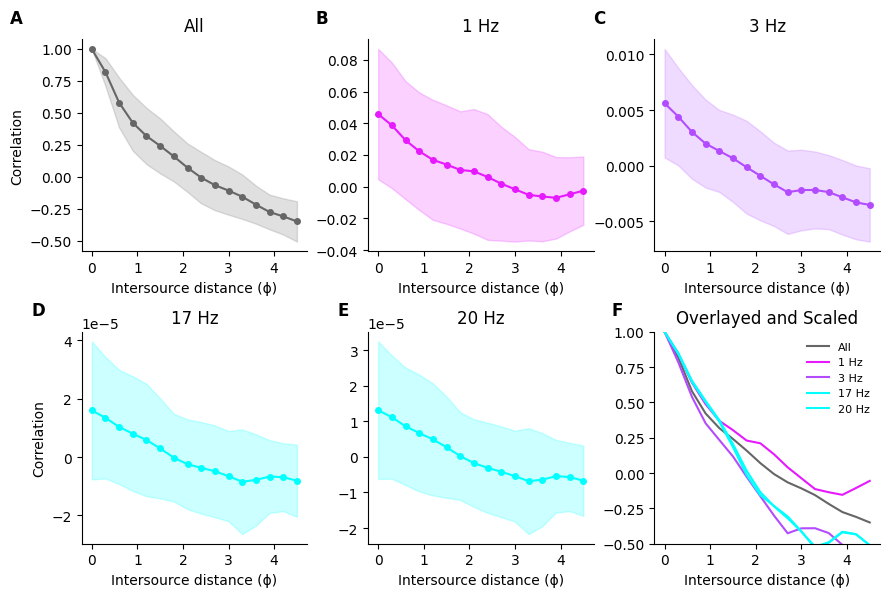

su_high_pink
Mapped frequencies [ 1  3 17 20] Hz to indices [8, 24, 136, 160].


Wrote figs/wnd_8sec_boxcar/corr_components_su_high_pink.pdf.


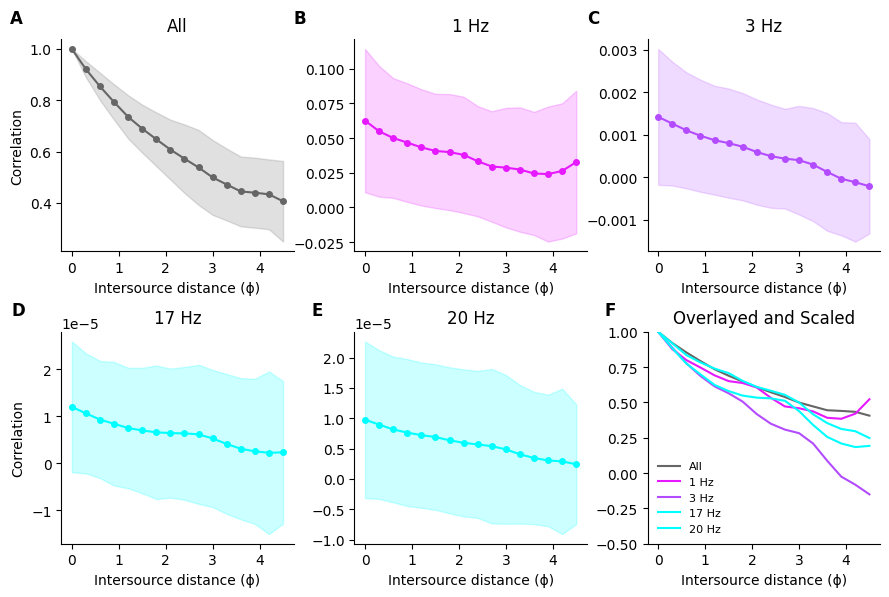

su_high2_pink
Mapped frequencies [ 1  3 17 20] Hz to indices [8, 24, 136, 160].


Wrote figs/wnd_8sec_boxcar/corr_components_su_high2_pink.pdf.


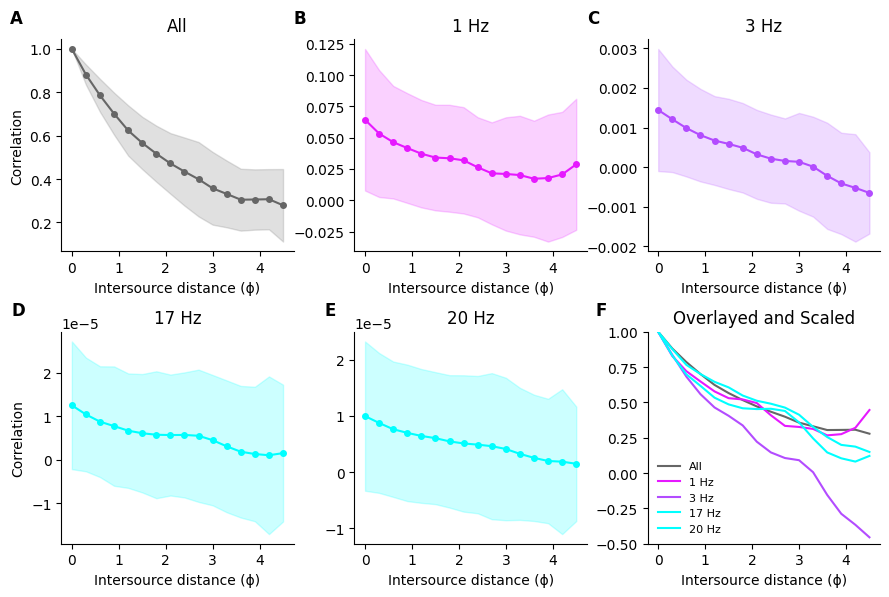

In [29]:
reload(fpf)
xlims_  = defaultdict(lambda: DEFAULT) #{"su_high":DEFAULT, "su":DEFAULT, "bw":DEFAULT, "cr":DEFAULT}
xticks_ = defaultdict(lambda: DEFAULT) #{"su_high":DEFAULT, "su":DEFAULT, "bw":DEFAULT, "cr":DEFAULT}
for k, F in data_wnd.items():
    which_freqs = ([1,3,17,20] if k.startswith("su_high") else [1,3,17,20]) * UNITS.Hz
    labs = [f"{f}" for f in which_freqs]
    cols = {"All":cm.gray(0.4)}; cols.update({l:col for l,col in zip(labs, [cm.cool(1 - f.magnitude/10) for f in which_freqs])})    
    print(k)
    slices = {"All":slice(1,10000)}
    freq_inds = F.freqs2inds(which_freqs)
    print(f"Mapped frequencies {which_freqs} to indices {freq_inds}.")
    slices.update({l:slice(fi, fi+1) for l, fi in zip(labs, freq_inds)})
    ax = fpf.plot_correlations(F.rho[iprb], F.pitch.to("um").magnitude, slices=slices, cols=cols, n_rows = 2, plot_order = ["All"] + labs)
    [(axi.set_xlabel(f"Intersource distance ({fpf.pitch_sym})"),
      not isdefault(xlims_[k])  and axi.set_xlim(xlims_[k]),
      not isdefault(xticks_[k]) and axi.set_xticks(xticks_[k])) for axi in ax]    
    file_name = f"{fig_dir}/corr_components_{k}.pdf"
    fpft.label_axes(ax, "ABCDEF", fontsize=12, fontweight="bold", dy=-0.01)
    ax[-1].set_ylim(-0.5,1)
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."))
    sys.stdout.flush(); plt.show()

# The Multivariate Gaussian Fits

bw
Mapped 5 Hz to index 40.


Wrote figs/wnd_8sec_hann/coef_vs_coef_bw_5Hz.pdf.


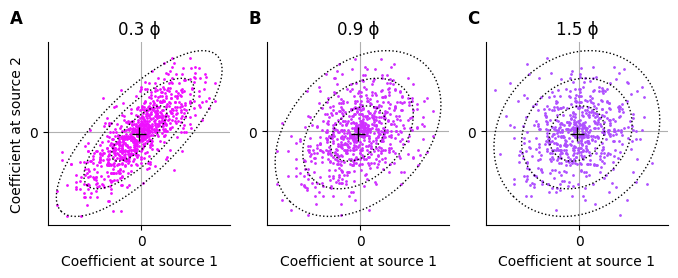

su_high2_pink
Mapped 5 Hz to index 40.


Wrote figs/wnd_8sec_hann/coef_vs_coef_su_high2_pink_5Hz.pdf.


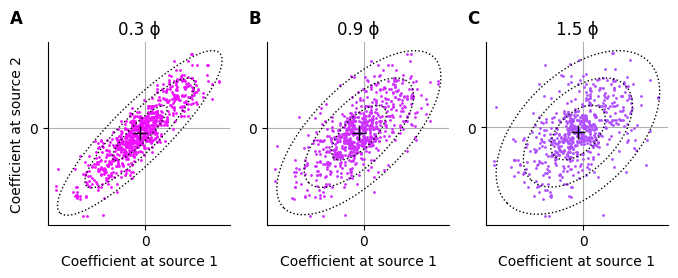

su_high_pink
Mapped 5 Hz to index 40.


Wrote figs/wnd_8sec_hann/coef_vs_coef_su_high_pink_5Hz.pdf.


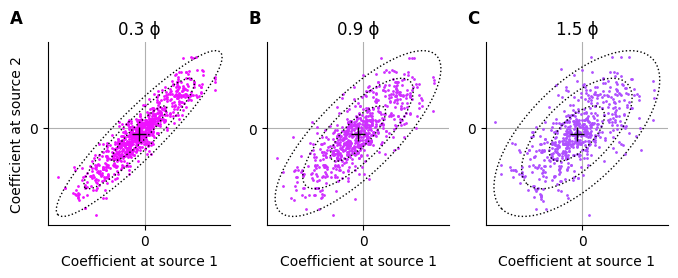

In [21]:
reload(fpf)
which_freqs = dict_update_from_field({"bw":5 * UNITS.hertz, "cr":5 * UNITS.hertz}, su_ds, "bw")
which_idists= dict_update_from_field({"bw":[0,2,4],         "cr":[8,12,18]},       su_ds, "bw")
dcol_scales = dict_update_from_field({"bw":120000,          "cr":80000},           su_ds, "bw")
for name, F in sorted(data_wnd.items()):
    print(name)
    which_freq = which_freqs[name]
    ifreq = F.freqs2inds([which_freq])[0]
    print(f"Mapped {which_freq} to index {ifreq}.")
    ax = fpf.plot_coef1_vs_coef2([F.ss[iprb], F.cc[iprb]],
                                 ifreq,
                                 F.pairs_um,
                                 F.pitch_string,                                 
                            i_pos_dists_to_plot = which_idists[name],
                            dist_col_scale = dcol_scales[name]
    )
    fpft.label_axes(ax, "ABC", fontsize=12, fontweight="bold", dy=-0.01)            
    file_name = f"{fig_dir}/coef_vs_coef_{name}_{which_freq.magnitude}Hz.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));
    sys.stdout.flush(); plt.show()

# Supplementary Information

Wrote figs/wnd_8sec_hann/coefs_and_traces_bw_5Hz.pdf.


<Figure size 800x300 with 0 Axes>

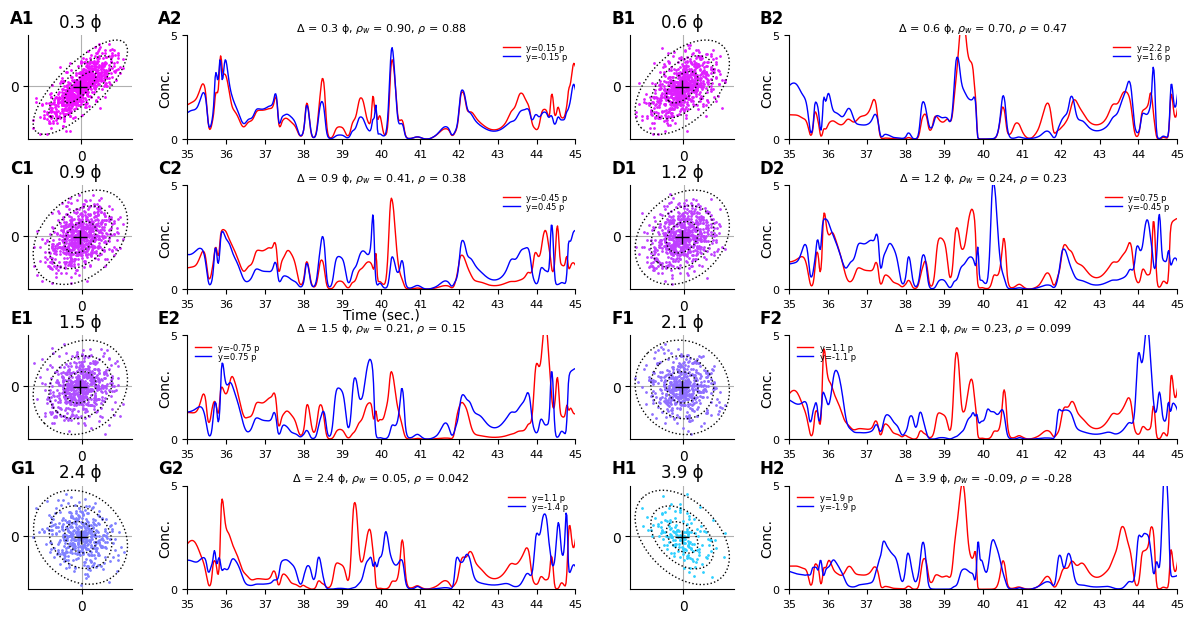

Wrote figs/wnd_8sec_hann/coefs_and_traces_su_high2_pink_5Hz.pdf.


<Figure size 800x300 with 0 Axes>

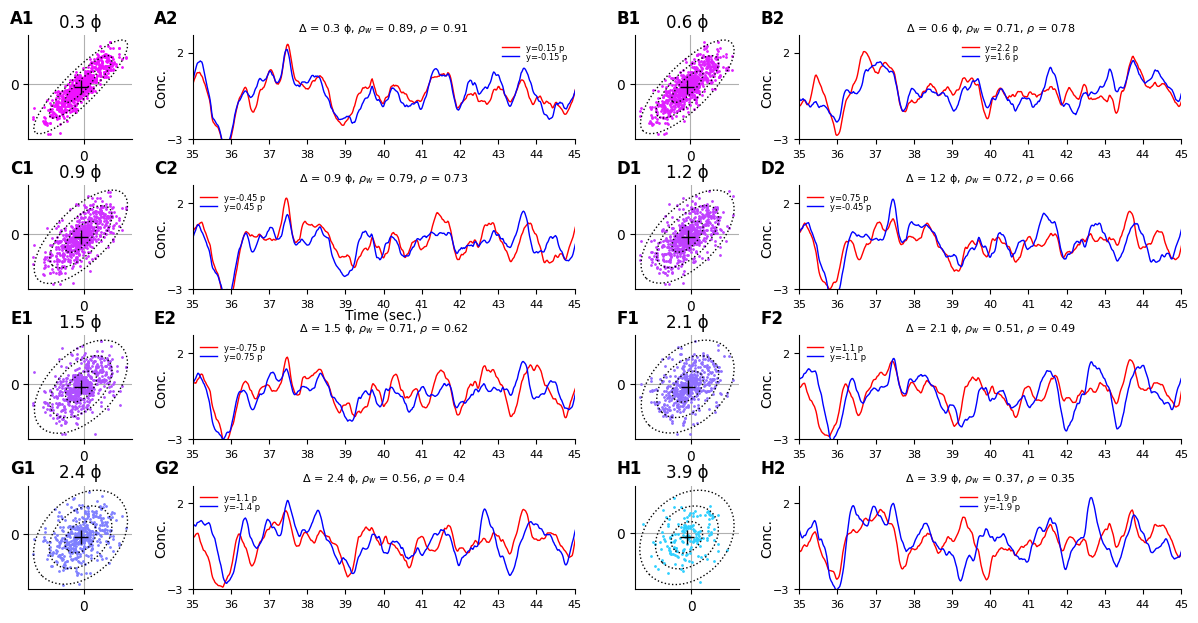

Wrote figs/wnd_8sec_hann/coefs_and_traces_su_high_pink_5Hz.pdf.


<Figure size 800x300 with 0 Axes>

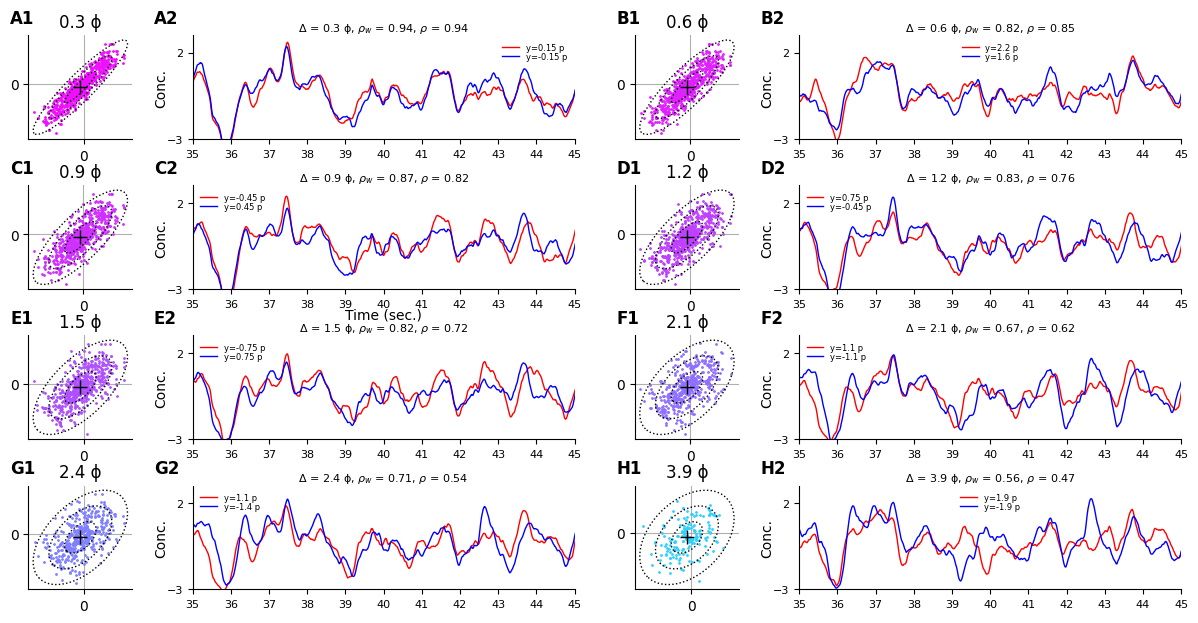

In [22]:
reload(fpf)
reload(fpft)
freq      = dict_update_from_field({"bw":5 * UNITS.hertz,          "cr":5 * UNITS.hertz},        su_ds, "bw")
idists    = dict_update_from_field({"bw":[0,1,2,3,4,6,7,12],       "cr":[0,4,8,12,16,20,21,22]}, su_ds, "bw")
t_lim     = dict_update_from_field({"bw":[35, 45]*UNITS.sec,       "cr":[39.5,40.5]*UNITS.sec},  su_ds, "bw")
dt        = dict_update_from_field({"bw":1*UNITS.sec,              "cr":0.25*UNITS.sec},         su_ds, "bw")
for k, F in sorted(data_wnd.items()):
    figure(figsize=(12,6))
    coef_ax, trace_ax = fpf.plot_coef_vs_coef_and_traces(F, freq[k], idists[k],
                                                         which_probe = iprb, n_per_row = 2,
                                                         y_lim=[0,5] if k[:2]!="su" else [-3,3],
                                                         t_lim = t_lim[k],
                                                         dt = dt[k])
    for ax in coef_ax:
        ax.set_xlabel("")
        ax.set_ylabel("")
    [ax.legend(fontsize=6,labelspacing=0,frameon=False) for ax in trace_ax]
    tight_layout(pad=0)
    all_ax = bsum([[ax_c, ax_t] for ax_c, ax_t in zip(coef_ax, trace_ax)], [])
    n_ax   = len(all_ax)
    fpft.label_axes(all_ax,
                    [ch+nu for ch in "ABCDEFGH" for nu in "12"],
                    align_x = [list(range(i,n_ax,4)) for i in range(4)],
                    align_y = [list(range(i,i+4)) for i in range(0,n_ax,4)],
                    fontsize=12, fontweight="bold", dy=-0.01)
    file_name = f"{fig_dir}/coefs_and_traces_{k}_{freq[k].to(UNITS.hertz).magnitude}Hz.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));
    sys.stdout.flush(); plt.show()

# Asymmetric Laplacian Fits

d=7500 @ Freq #   1: -np.log10(p) = 186.028
[0.73388985 0.51996969 0.86476028 ... 0.76979393 0.53486929 0.85914464]
d=15000 @ Freq #   1: -np.log10(p) = 119.311
[ 0.41043656 -0.69356516 -0.75728178 ... -0.11119759  0.68824137
  0.70938795]
d=22500 @ Freq #   1: -np.log10(p) = 86.606
[ 0.52465104 -0.64267089 -0.72976078 ... -0.03530174  0.36959607
  0.30982411]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_1Hz.pdf.


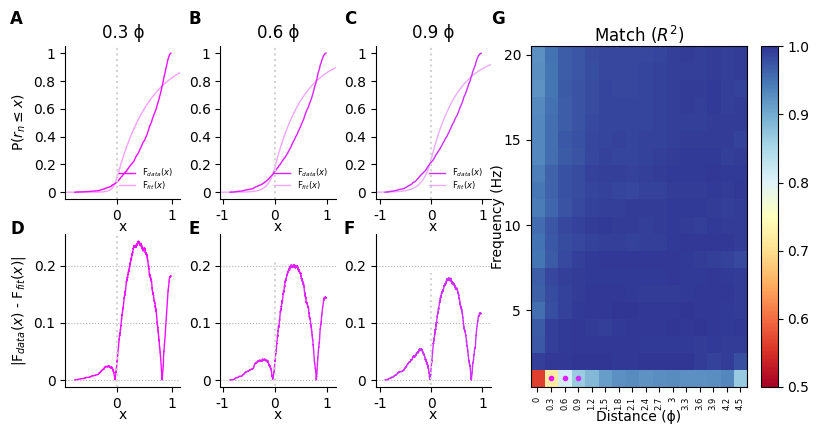

d=7500 @ Freq #   5: -np.log10(p) = 16.345
[0.0091029  0.00678568 0.00960195 ... 0.0087308  0.00015387 0.00015828]
d=15000 @ Freq #   5: -np.log10(p) = 10.876


[-0.0002165  -0.004996    0.00057478 ...  0.00910371  0.00123307
  0.00080148]
d=22500 @ Freq #   5: -np.log10(p) = 4.149
[-1.72389146e-03 -3.84122735e-03  6.44805069e-03 ...  8.94878419e-03
  5.86628035e-05  6.58186615e-03]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_5Hz.pdf.


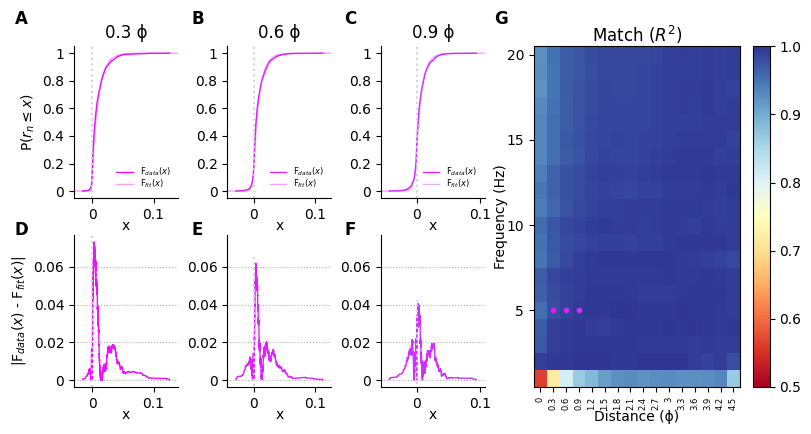

d=7500 @ Freq #  10: -np.log10(p) = 22.775
[0.00136297 0.00351137 0.0028401  ... 0.00155282 0.00165557 0.00078295]
d=15000 @ Freq #  10: -np.log10(p) = 12.345
[ 0.00010447 -0.00201933  0.0009858  ...  0.00202633  0.00139685
  0.00038532]
d=22500 @ Freq #  10: -np.log10(p) = 8.178
[-0.00016401 -0.0017123   0.00210008 ...  0.00457412 -0.00022518
  0.00123328]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_10Hz.pdf.


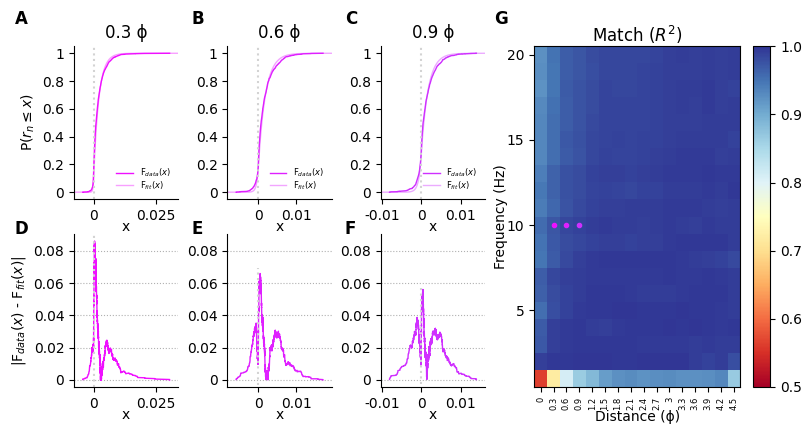

d=7500 @ Freq #   1: -np.log10(p) = 249.918
[0.76124934 0.26393023 0.7551393  ... 0.78477921 0.53882475 0.85718497]
d=15000 @ Freq #   1: -np.log10(p) = 212.636
[ 0.44326061 -0.52727059 -0.54164111 ...  0.25928482  0.67024778
  0.78370204]
d=22500 @ Freq #   1: -np.log10(p) = 168.100
[ 0.52613634 -0.49309499 -0.48684591 ...  0.40781124  0.75438323
  0.80037718]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_high2_pink_1Hz.pdf.


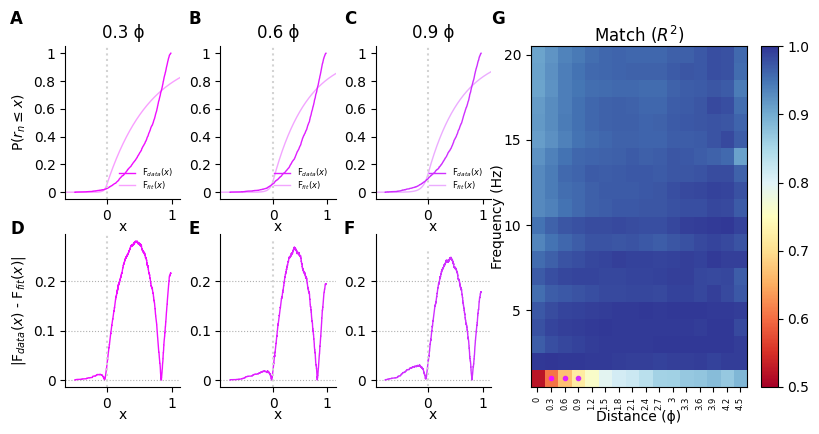

d=7500 @ Freq #   5: -np.log10(p) = 15.799
[0.00831964 0.0071913  0.01007416 ... 0.00849681 0.00016904 0.0001286 ]
d=15000 @ Freq #   5: -np.log10(p) = 11.618
[ 0.00017766 -0.00138632 -0.00092293 ...  0.01111885  0.00087198
  0.00051517]
d=22500 @ Freq #   5: -np.log10(p) = 9.874
[-0.00072938 -0.00060967  0.00284266 ...  0.01585919  0.005034
  0.00527877]


Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_high2_pink_5Hz.pdf.


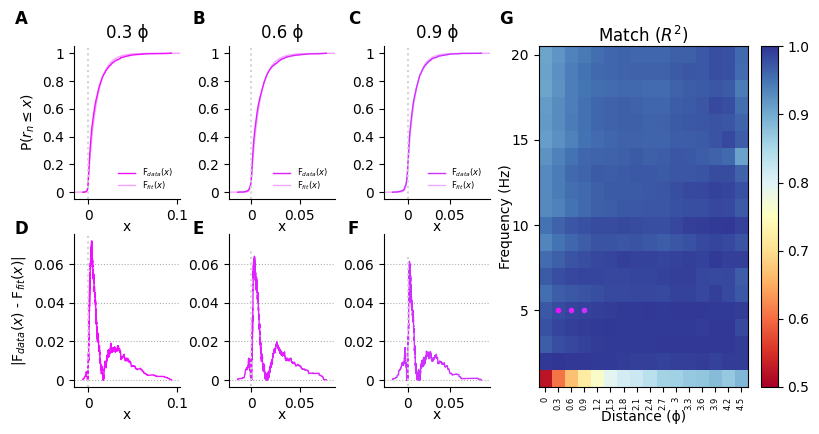

d=7500 @ Freq #  10: -np.log10(p) = 28.970
[0.00106085 0.00645723 0.003851   ... 0.00147079 0.00155268 0.00072225]
d=15000 @ Freq #  10: -np.log10(p) = 19.103
[-6.98838563e-05 -2.18953109e-03  8.35712343e-04 ...  2.26525706e-03
  1.40761919e-03  5.04757317e-04]
d=22500 @ Freq #  10: -np.log10(p) = 14.774
[-0.00038276 -0.00166043  0.00166788 ...  0.00536605  0.00208251
  0.00156376]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_high2_pink_10Hz.pdf.


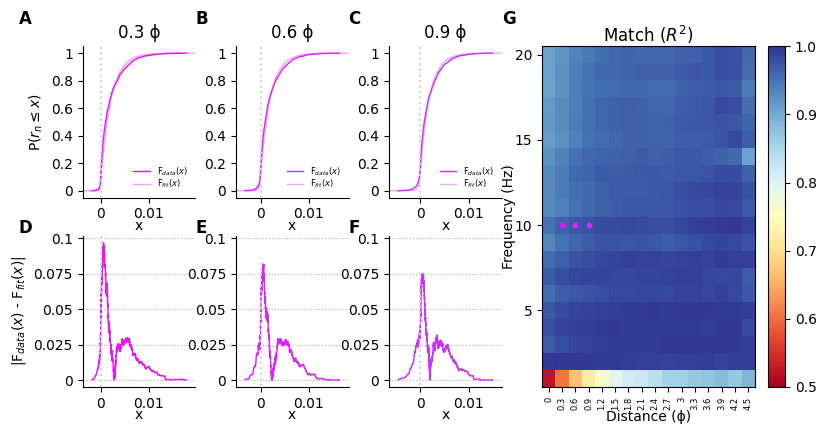

d=7500 @ Freq #   1: -np.log10(p) = 249.779
[0.76114325 0.26391665 0.75521993 ... 0.78475242 0.53879624 0.85722164]
d=15000 @ Freq #   1: -np.log10(p) = 212.587
[ 0.44314775 -0.52736213 -0.54172248 ...  0.25924434  0.67024484
  0.78371201]
d=22500 @ Freq #   1: -np.log10(p) = 167.955
[ 0.52590221 -0.49317755 -0.48692181 ...  0.40792909  0.75432541
  0.80044176]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_high_pink_1Hz.pdf.


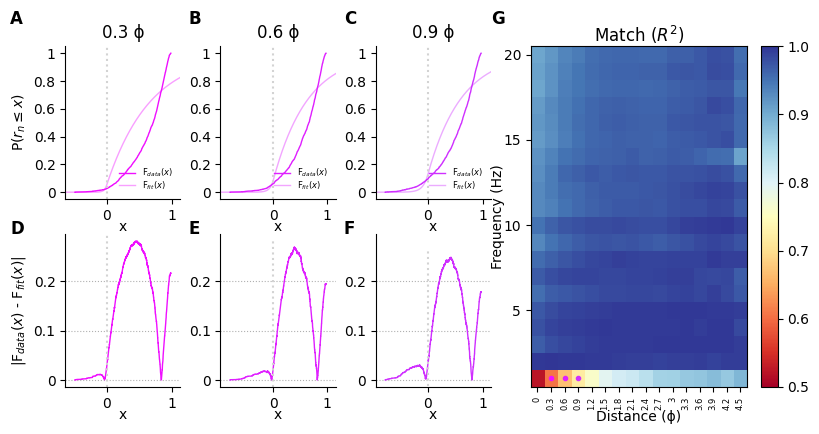

d=7500 @ Freq #   5: -np.log10(p) = 15.863
[0.00831057 0.0071875  0.01007569 ... 0.00849963 0.00017079 0.00012878]
d=15000 @ Freq #   5: -np.log10(p) = 11.674
[ 0.00017955 -0.00139071 -0.00093342 ...  0.01113063  0.00087492
  0.00051399]
d=22500 @ Freq #   5: -np.log10(p) = 10.048
[-0.00072416 -0.00061461  0.0028347  ...  0.01587716  0.00504016
  0.00528596]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_high_pink_5Hz.pdf.


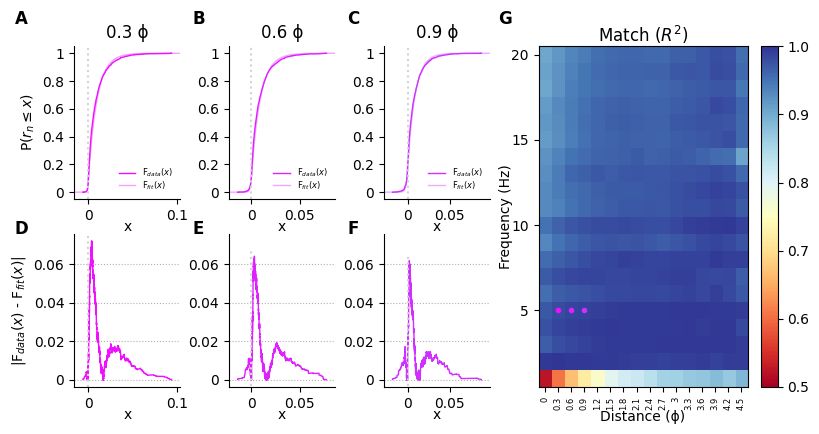

d=7500 @ Freq #  10: -np.log10(p) = 28.059
[0.00107039 0.00648442 0.00384829 ... 0.00147313 0.00155484 0.0007246 ]
d=15000 @ Freq #  10: -np.log10(p) = 18.963
[-6.32932490e-05 -2.20281589e-03  8.13937774e-04 ...  2.27782638e-03
  1.41432304e-03  5.04658566e-04]
d=22500 @ Freq #  10: -np.log10(p) = 16.026
[-0.00037026 -0.00166827  0.0016526  ...  0.00538394  0.00208798
  0.00156455]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_high_pink_10Hz.pdf.


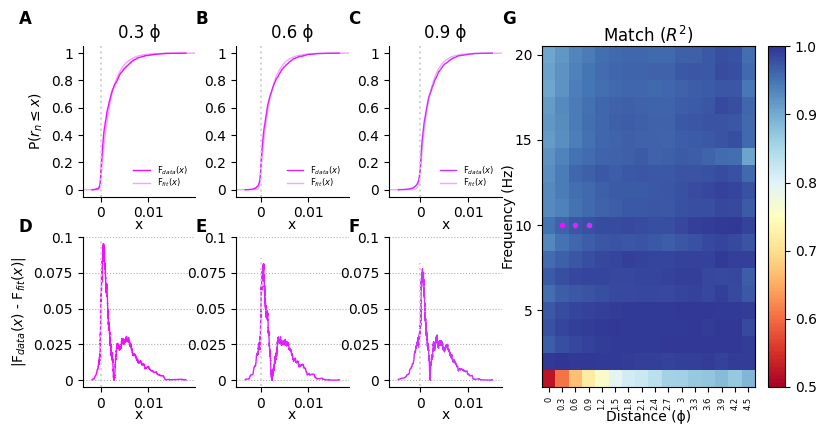

d=7500 @ Freq #   1: -np.log10(p) = 2.519
[ 0.02295597 -0.00019045  0.08205085 ...  0.09162192  0.01768265
  0.03678076]
d=15000 @ Freq #   1: -np.log10(p) = 4.141
[ 0.0280275  -0.00945674 -0.01106184 ...  0.05884533  0.02615483
  0.0352756 ]
d=22500 @ Freq #   1: -np.log10(p) = 4.111
[ 0.02773823 -0.00641014 -0.00544311 ...  0.02805933  0.09384825
  0.1157981 ]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_high_white_1Hz.pdf.


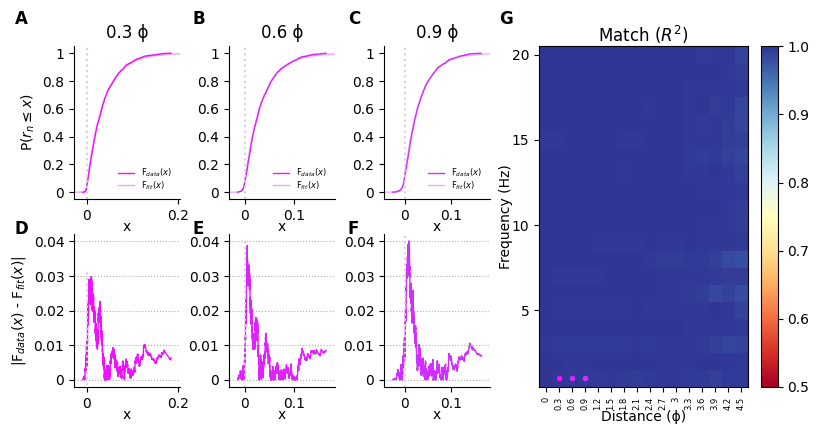

d=7500 @ Freq #   5: -np.log10(p) = 2.051
[ 0.04902386  0.04167906 -0.00579472 ...  0.02296296  0.0203833
  0.02244509]
d=15000 @ Freq #   5: -np.log10(p) = 2.182
[0.04446598 0.04593648 0.00936448 ... 0.01748916 0.00775104 0.01730985]
d=22500 @ Freq #   5: -np.log10(p) = 3.118
[0.04172262 0.03566188 0.00344249 ... 0.04500145 0.00508519 0.00676729]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_high_white_5Hz.pdf.


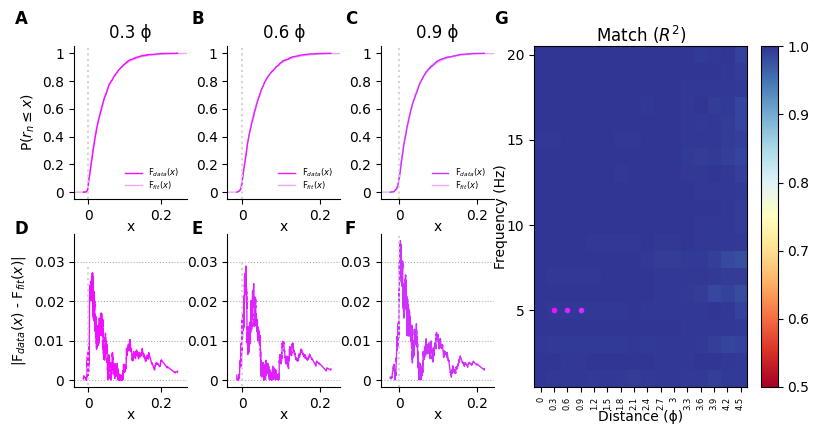

d=7500 @ Freq #  10: -np.log10(p) = 1.913
[ 0.0375427   0.02150126  0.11772681 ...  0.02795427  0.02491991
 -0.00174584]
d=15000 @ Freq #  10: -np.log10(p) = 2.078
[ 0.04759286  0.01260464  0.01884541 ...  0.03269833  0.03350806
 -0.00492643]
d=22500 @ Freq #  10: -np.log10(p) = 1.792


[0.02646827 0.01037782 0.013177   ... 0.0523775  0.00856881 0.07198358]
Setting extent to [-0.5, 15.5, 0.5, 20.5].


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec_boxcar/alap_fits_su_high_white_10Hz.pdf.


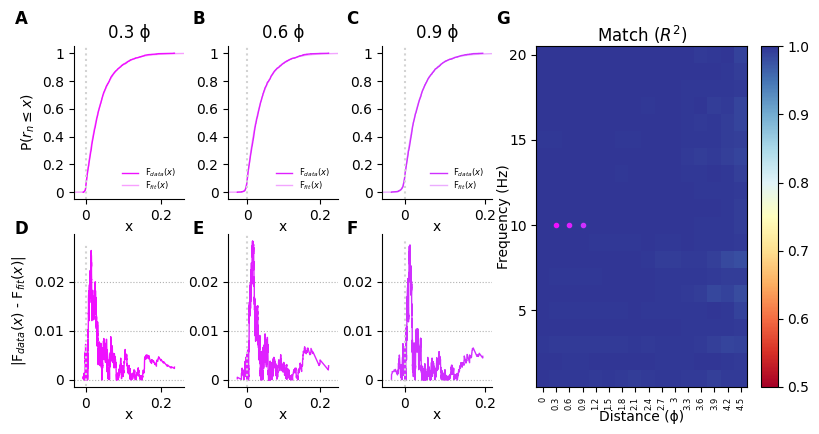

In [153]:
reload(fpft)
reload(fpf)
which_wnd_sec = wnd_sec_vals[0]
idist     = dict_update_from_field({"bw":[1,2,3],          "cr":[1,13,19]},         su_ds, "bw")
freq_max  = dict_update_from_field({"bw":21 * UNITS.hertz, "cr":101 * UNITS.hertz}, su_ds, "bw")
vmin      = dict_update_from_field({"bw":[0,0.5],          "cr":[0,0.5]},           su_ds, "bw")
vmax      = dict_update_from_field({"bw":[50,1],           "cr":[10,1]},            su_ds, "bw")
plot_pvals= False
for name, F in sorted(data_wnd.items()):
    if name == "bw": continue
    d = np.array(list(F.rho[iprb].keys()))
    d = np.sort(d[d>=0])
    for f in [1, 5, 10] * UNITS.hertz:
        which_freq = defaultdict(lambda: f)
        ax_cdf, ax_dcdf, ax_hm = fpf.plot_alaplace_fits(F, d[idist[name]],
                                                        which_probe = iprb,
                               ifreq_lim = [1, F.freqs2inds([freq_max[name]])[0]],
                               which_ifreq = F.freqs2inds([which_freq[name]])[0],
                                                        figsize=(8,4),
                                                        vmax=vmax[name],
                                                        vmin=vmin[name],
                                                        plot_dvals=True,
                                                        plot_pvals=plot_pvals)
        tight_layout(pad=0)
        fpft.label_axes(ax_cdf + ax_dcdf + ax_hm, "ABCDEFGHIJK",
                        align_y = [[0,1,2,6],[3,4,5,7]] if plot_pvals else [[0,1,2],[3,4,5]],
                        align_x = [[0,3],[1,4],[2,5]],
                        fontsize=12, fontweight="bold", dy=0)
        file_name = f"{fig_dir}/alap_fits_{name}_{which_freq[name].to(UNITS.hertz).magnitude}Hz.pdf"
        SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));
        sys.stdout.flush(); plt.show()

# Plot the figure showing λ(s)

      fisher_plumes_figs 2023/05/19 11:55:43     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[8, 24, 56, 80], log_scale=True.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


Wrote figs/wnd_8sec_boxcar/la_vs_s_fits_bw.pdf.


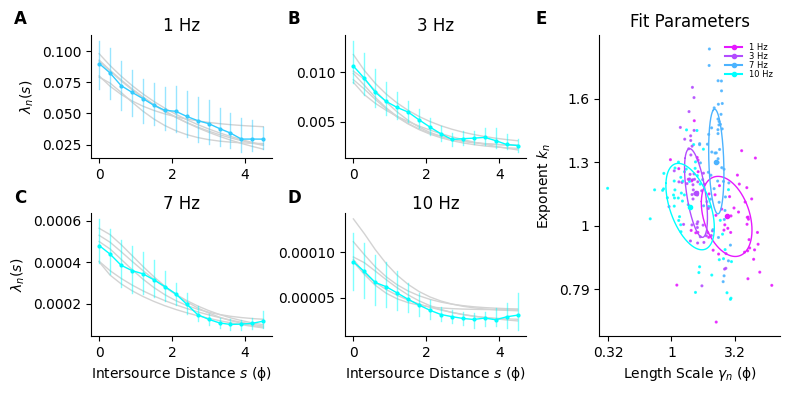

      fisher_plumes_figs 2023/05/19 11:55:44     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[8, 24, 136, 160], log_scale=True.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


Wrote figs/wnd_8sec_boxcar/la_vs_s_fits_su_high2_pink.pdf.


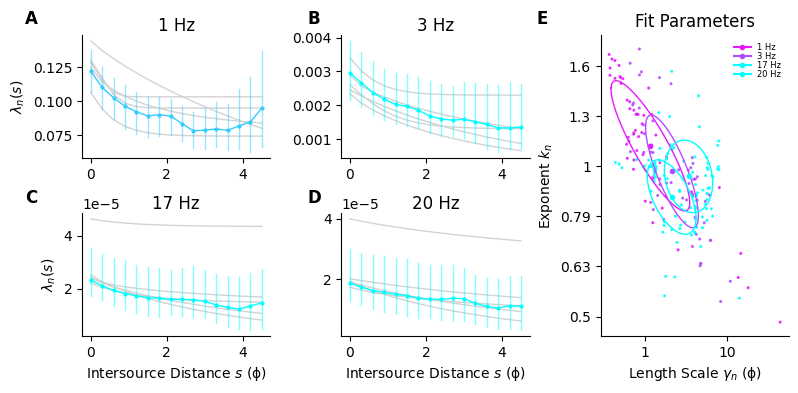

      fisher_plumes_figs 2023/05/19 11:55:46     INFO: plot_gen_exp_paramter_fits_panel with which_fis=[8, 24, 136, 160], log_scale=True.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/colors.py:710: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  xa = np.array(X, copy=True)


Wrote figs/wnd_8sec_boxcar/la_vs_s_fits_su_high_pink.pdf.


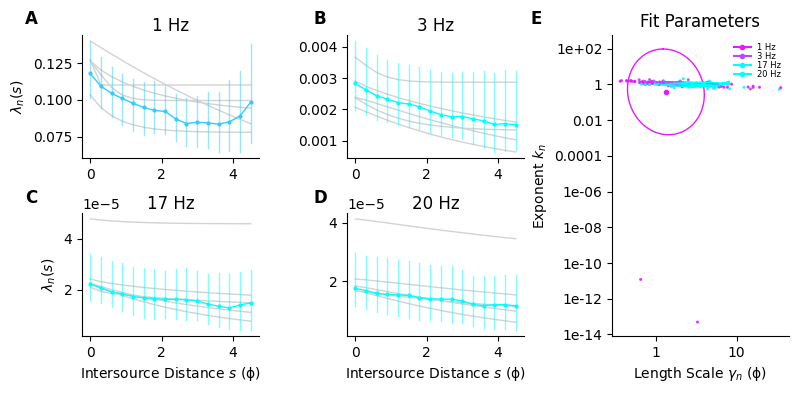

In [30]:
reload(fpft)
reload(fpf)
freqs  = dict_update({fld:[1,3,7,10] * UNITS.hertz for fld in ["bw", "cr", "su"]}, ["su_high_white", "su_high_pink", "su_high2_pink"], [[1,3,17,20] * UNITS.hertz]*3)
xl     = dict_update_from_field({"bw":(-10,200),                 "cr": (-2, 50)},                    su_ds, "bw")
xt     = dict_update_from_field({"bw":arange(0,201,50),          "cr": arange(0,101,25)},            su_ds, "bw")
xtp    = dict_update_from_field({"bw":np.array([60,90,135]),     "cr": np.array([40,60, 90, 135])},  su_ds, "bw")
ytp    = dict_update_from_field({"bw":np.array([0.8,1,1.2,1.5]), "cr": np.array([0.8,1,1.2,1.5,2])}, su_ds, "bw")
for k, F in sorted(data_wnd.items()):
    ax = fpf.plot_la_gen_fits_vs_distance(F, 
                                          figsize=(8,4), legloc = 'right',
                                          log_scale = True,
                                          scatter_size=1.5,
                                          which_ifreqs = F.freqs2inds(freqs[k]))
    [((i>1) and axi.set_xlabel(f"Intersource Distance $s$ ({fpf.pitch_sym})")) for i, axi in enumerate(ax[:4])]
    tight_layout(h_pad=1,w_pad=0.5)
    fpft.label_axes(ax, "ABCDEFGHIJK",
                    align_y = [[0,1,4],[2,3]],
                    align_x = [[0,2],[1,3]],
                    fontsize=12, fontweight="bold", dy=-0.02)                        
    file_name = f"{fig_dir}/la_vs_s_fits_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));
    sys.stdout.flush(); plt.show()

# Plot the Fisher Information

      fisher_plumes_figs 2023/05/19 11:52:40     INFO: dd[0]=100, dd[-1]=125000 (0.004, 5 ϕ)


      fisher_plumes_figs 2023/05/19 11:52:40     INFO: Plotting which_ifreqs=[8, 16, 40, 80, 160].


Wrote figs/wnd_8sec_hann/fisher_info_bw.pdf.


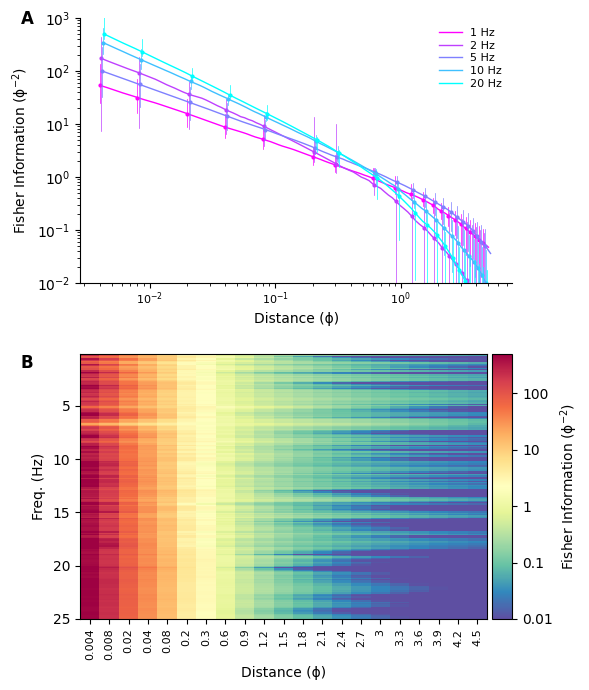

      fisher_plumes_figs 2023/05/19 11:52:42     INFO: dd[0]=100, dd[-1]=125000 (0.004, 5 ϕ)


      fisher_plumes_figs 2023/05/19 11:52:43     INFO: Plotting which_ifreqs=[8, 16, 40, 80, 160].


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:652: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(I[ind_use]),


Wrote figs/wnd_8sec_hann/fisher_info_su_high2_pink.pdf.


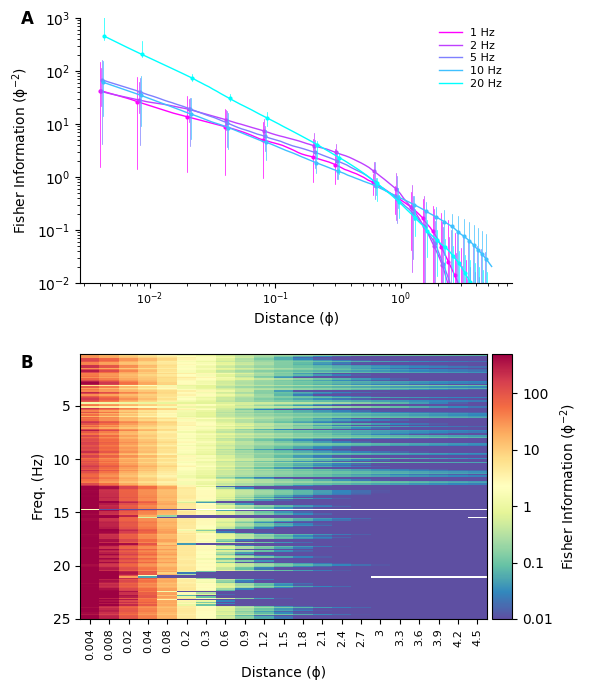

      fisher_plumes_figs 2023/05/19 11:52:44     INFO: dd[0]=100, dd[-1]=125000 (0.004, 5 ϕ)


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_tools.py:164: RuntimeWarning: divide by zero encountered in true_divide
  return coef * num1 / den1 / den2


      fisher_plumes_figs 2023/05/19 11:52:45     INFO: Plotting which_ifreqs=[8, 16, 40, 80, 160].


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:652: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(I[ind_use]),


Wrote figs/wnd_8sec_hann/fisher_info_su_high_pink.pdf.


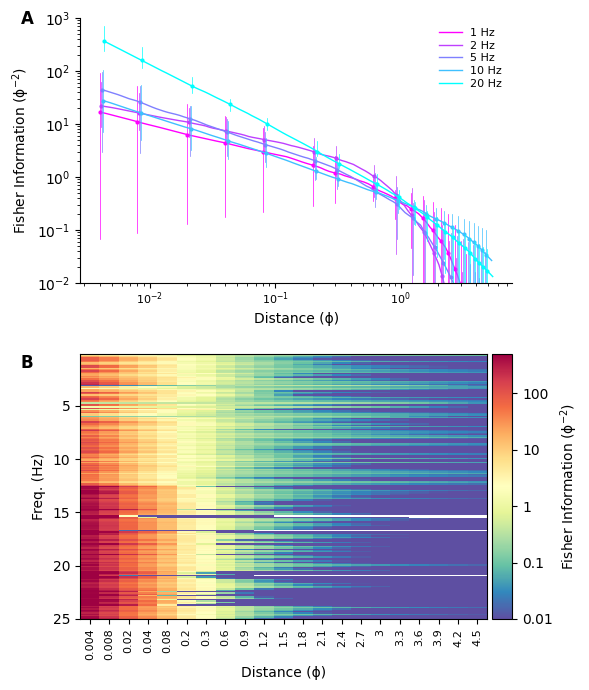

In [24]:
reload(fpt)
reload(fpft)
reload(fpf)
freqs     = dict_update_from_field({"cr":[5,10,20,50,100] * UNITS.hertz, "bw":[1,2, 5, 10, 20] * UNITS.hertz}, su_ds, "bw")
freq_max  = dict_update_from_field({"bw":25 * UNITS.hertz, "cr":100 * UNITS.hertz}, su_ds, "bw")
colscale  = dict_update_from_field({"bw":10,               "cr":40},                su_ds, "bw")
d_vals_um = dict_update_from_field({"bw":[1,5,50],         "cr":[0.1,10,70]},       su_ds, "bw")
d_lim_um  = dict_update_from_field({"bw":[100, 125000 ],   "cr":[100, 125000]},     su_ds, "bw")
bf_ytick  = dict_update_from_field({"bw":[0,5,10],         "cr":[0,50,100]},        su_ds, "bw")
bf_yl     = dict_update_from_field({"bw":[0,15],           "cr":[-5,100]},          su_ds, "bw")
plot_param_fits = False
for k, F in sorted(data_wnd.items()):
    figure(figsize=(6,7))
    ax_fisher, ax_best_freq, ax_d = fpf.plot_fisher_information(F,
                                                                which_probe = iprb,
                                                                d_lim_um   = d_lim_um[k],
                                                                d_vals_um  = np.array(d_vals_um[k])*1000,
                                                                d_space_fun  = lambda d0,d1,n:np.logspace(log10(d0),log10(d1),n),
                                                                which_ifreqs = F.freqs2inds(freqs[k]),
                                                                x_stagger = lambda x, i: x*(1.02**i),
                                                                plot_fun = plt.loglog,
                                                                log_scale = True,
                                                                plot_param_fits = plot_param_fits,
                                                                freq_max  = freq_max[k],
                                                                colfun    = lambda f: cm.cool_r(f/colscale[k]),
                                                                info_heatmap = True,
                                                                heatmap_range =[-2, log10(500)],
                                                                heatmap_cm    =cm.Spectral_r,
                                                                #bf_ytick  = bf_ytick[k],
    )
    ax_fisher.set_ylim(1e-2,1e3)
    tight_layout(h_pad=2,w_pad=0)
    fpft.label_axes([ax_fisher, ax_best_freq] + ax_d , "ABCDEFGHIJK",
                    #align_y = [[2,3,4]],
                    align_x = [[0,1,2] if plot_param_fits else [0,1]],
                    fontsize=12, fontweight="bold", dy=-0.02)
    #ax_best_freq.set_ylim(bf_yl[k])
    file_name = f"{fig_dir}/fisher_info_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));
    sys.stdout.flush(); plt.show()
    

# Plot Fisher information heatmaps together

Wrote figs/fisher_info_heatmaps.pdf.


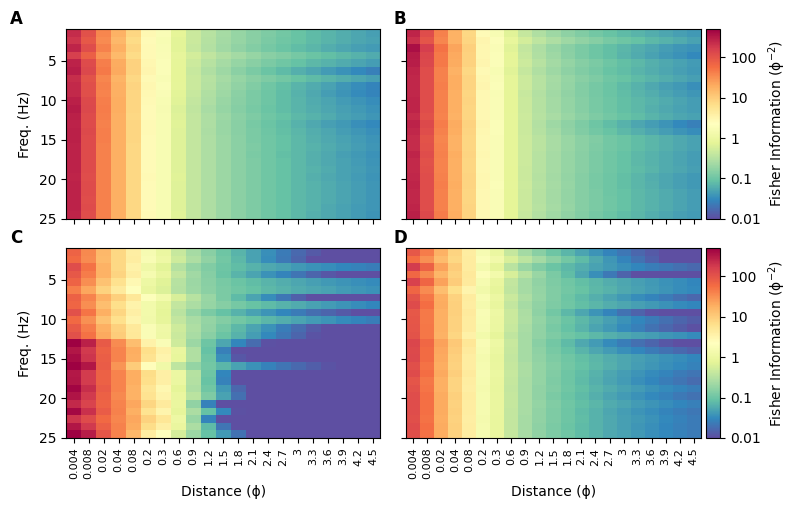

In [218]:
figure(figsize=(8,5))
gs = GridSpec(2,2)
order = ["bw", "su", "su_high_white", "su_high_pink"]
which_wnd = (1 * UNITS.s, 'boxcar')
axes, cbs = [], []
for o, gsi in zip(order, gs):
    axes.append(subplot(gsi))
    axes[-1], cbi = fpf.plot_fisher_information_heatmap(proc[o][which_wnd], 0, ax = axes[-1], freq_max = freq_max[o],
                                                        heatmap_range =[-2, log10(500)],
                                                        heatmap_cm    =cm.Spectral_r,
                                                        do_colorbar   = gsi.is_last_col(),
    )
    if gsi.is_first_row():
        axes[-1].tick_params(labelbottom=False)
        axes[-1].set_xlabel("")

    if not gsi.is_first_col():
        axes[-1].tick_params(labelleft = False)
        axes[-1].set_ylabel("")
tight_layout(w_pad = 1.5, h_pad=1.5)
fpft.label_axes(axes, "ABCD",
                align_y = [[0,1],[2,3]],
                align_x = [[0,2],[1,3]],
                fontsize=12, fontweight="bold", dy=0.01, dx = -0.01)
file_name = f"figs/fisher_info_heatmaps.pdf"
SAVEPLOTS and (savefig(file_name, bbox_inches='tight', pad_inches=0), flush(f"Wrote {file_name}."));
sys.stdout.flush(); plt.show()
        

# Main figure showing effect of windowing

Wrote figs/effect_of_windowing.pdf.


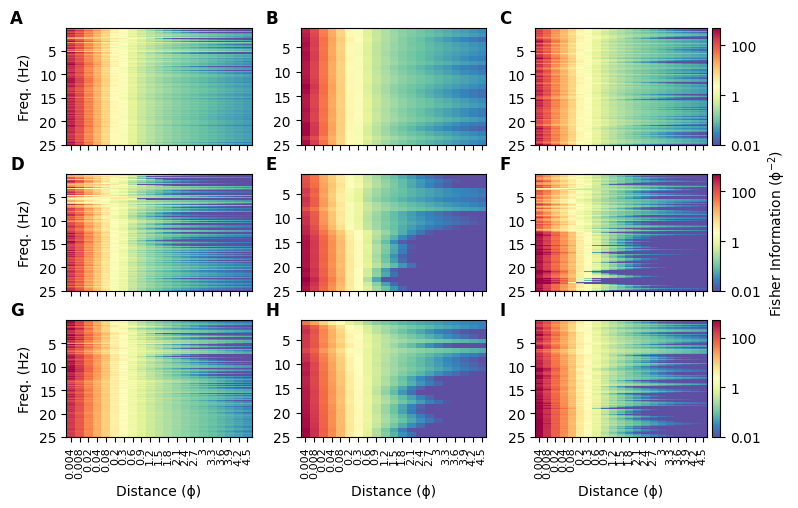

In [215]:
reload(fpf)
figure(figsize=(8,5))
col_keys = [(10 * UNITS.s, 'boxcar'), (1 * UNITS.s, 'hann'), (5 * UNITS.s, 'hann')]
heatmap_range = defaultdict(lambda: [-2, log10(500)], {"bw":[-2,log10(500)], "su_high2_pink":[-2,log10(500)]})
row_ds   = ["su", "su_high_pink", "bw"]
gs       = GridSpec(len(row_ds), len(col_keys))
ax       = []
for i, ds in enumerate(row_ds):
    for j, ck in enumerate(col_keys):
        ax.append(subplot(gs[i,j]))
        p = proc[ds][ck]
        _, cb = fpf.plot_fisher_information_heatmap(
            p, 0, ax = ax[-1], heatmap_range = heatmap_range[ds],
            do_colorbar = gs[i,j].is_last_col(),
        )
        if gs[i,j].is_last_col() and i!=1: cb.ax.set_ylabel("")
        if not gs[i,j].is_first_col(): ax[-1].set_ylabel("")
        if not gs[i,j].is_last_row():  [ax[-1].set_xlabel(""),ax[-1].set_xticklabels([])]
tight_layout(w_pad = 1.5, h_pad=1.5)
fpft.label_axes(ax, "ABCDEFGHI",
                align_y = [[0,1,2],[3,4,5],[6,7,8]],
                align_x = [[0,3,6],[1,4,7],[2,5,8]],
                fontsize=12, fontweight="bold", dy=0.01, dx = -0.01)
file_name = f"figs/effect_of_windowing.pdf"
SAVEPLOTS and (savefig(file_name, bbox_inches='tight', pad_inches=0), flush(f"Wrote {file_name}."));
sys.stdout.flush(); plt.show()
        


# Information heatmaps as window size is changed

Wrote figs/bw_boxcar_series.pdf.


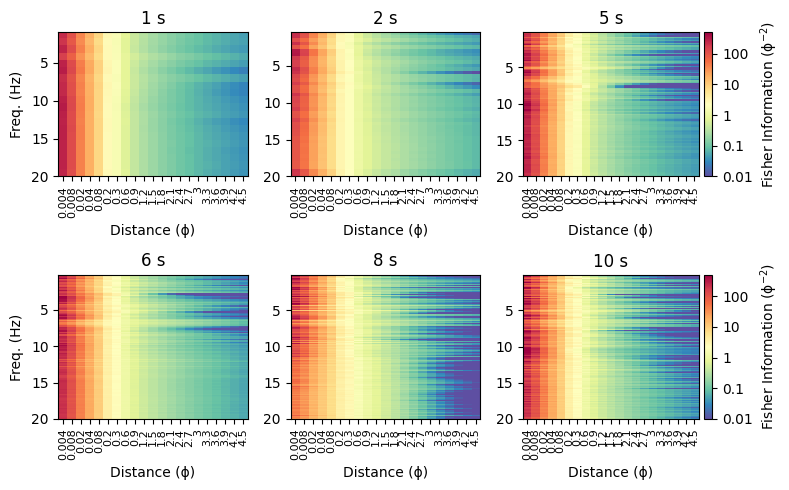

Wrote figs/bw_hann_series.pdf.


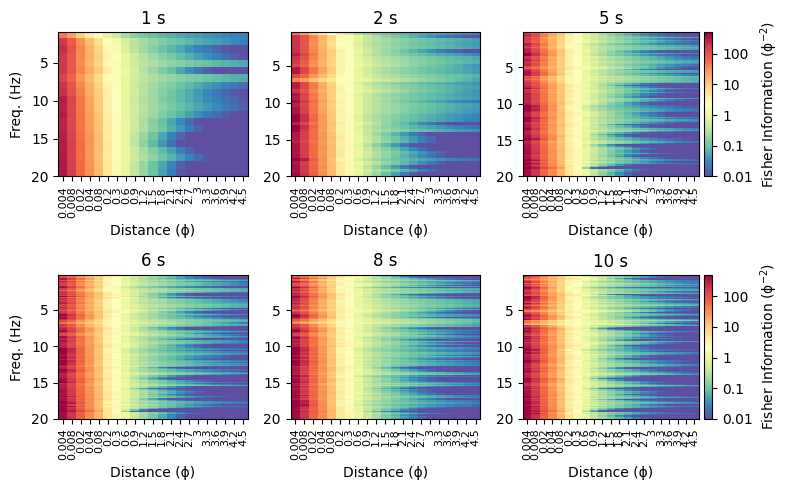

Wrote figs/su_high_pink_boxcar_series.pdf.


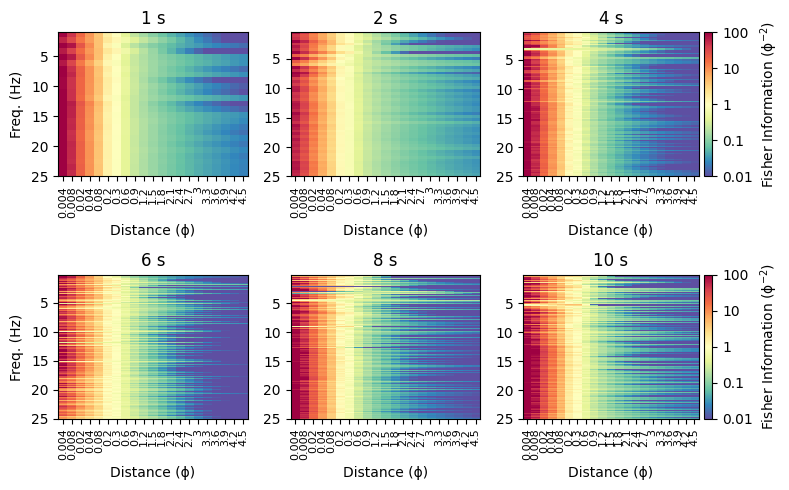

/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_figs.py:652: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(I[ind_use]),


Wrote figs/su_high_pink_hann_series.pdf.


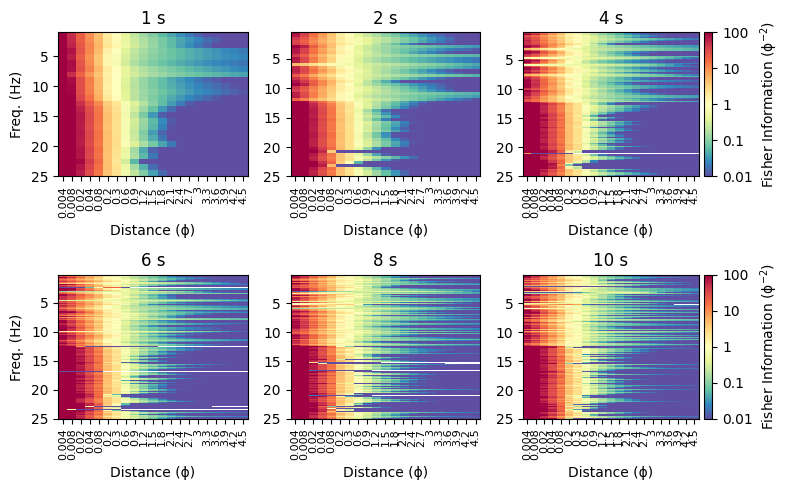

In [102]:
reload(fpf)
heatmap_range = defaultdict(lambda: [-2, log10(500)], {"cr":[-2,2], "su_high_pink":[-2,2]})
figsize       = defaultdict(lambda: (8,5), {"cr":(8,8)})
for ds, pr in proc.items():
    wnd_types = {fpt.get_window_name(f[1]) for f in pr}
    if len(wnd_types)>1:
        for wnd_type in wnd_types:
            fpf.plot_window_series(proc[ds], wnd_type, heatmap_range = heatmap_range[ds], figsize = figsize[ds])
            file_name = f"figs/{ds}_{wnd_type}_series.pdf"
            SAVEPLOTS and (savefig(file_name, bbox_inches='tight', pad_inches=0), flush(f"Wrote {file_name}."));
            sys.stdout.flush(); plt.show()

# Plot best frequency for each probe

/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_bw.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_cr.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_su.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_su_high_pink.pdf.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Wrote figs/wnd_1sec/best_freq_su_high_white.pdf.


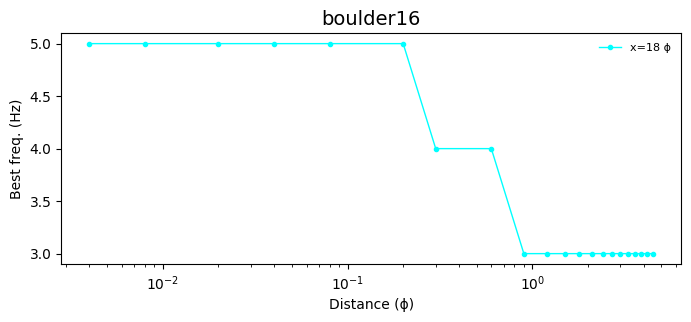

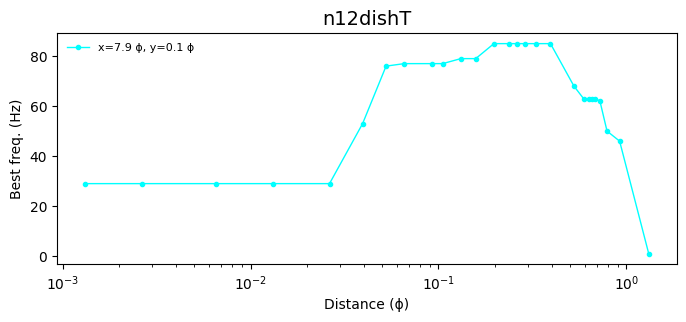

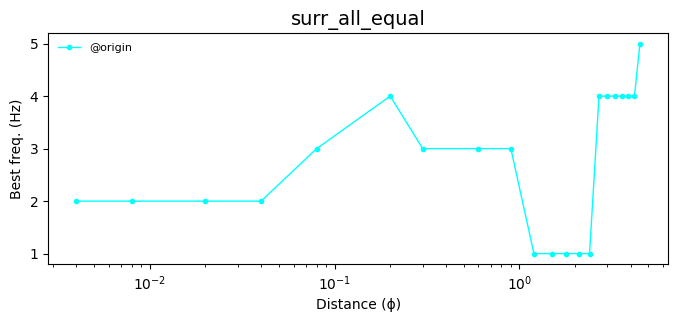

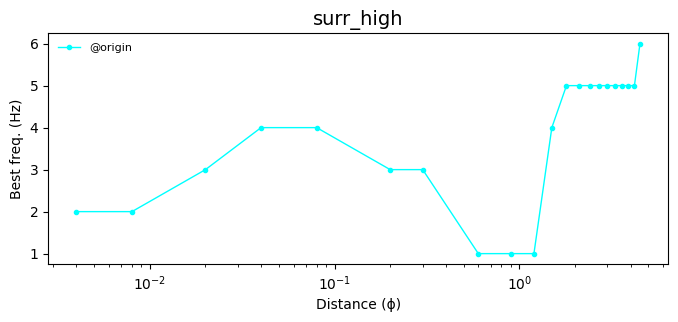

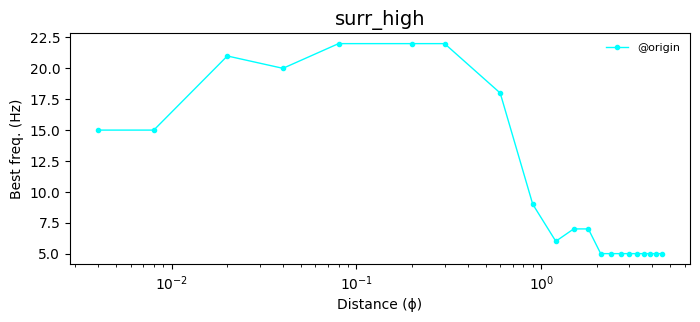

In [30]:
for k, F in sorted(data_wnd.items()):
    probe_coords = utils.d1(F.sims).get_used_probe_coords()
    probe_xcoords_sorted = sorted([p[0] for p in probe_coords])
    probe_names = utils.d1(F.sims).coord_strs
    n_probes = len(probe_coords)
    figure(figsize=(8,3))
    dd = F.I_dists/F.pitch.to(UNITS.um).magnitude
    for which_probe, (px,py) in enumerate(probe_coords):
        semilogx(dd, median(F.freqs[F.I_best_ifreqs[which_probe]][1:],axis=0),
                 "o-",markersize=3, linewidth=1, color = cm.cool(probe_xcoords_sorted.index(px)/max((n_probes-1),1)), label=probe_names[which_probe])
    xlabel("Distance (ϕ)")
    ylabel("Best freq. (Hz)")
    title(F.name, fontsize=14)
    legend(frameon=False, labelspacing=0, fontsize=8)
    file_name = f"{fig_dir}/best_freq_{k}.pdf"
    SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));
        


# Plot the Power in each Signal

Wrote figs/wnd_1sec/spectra.pdf.


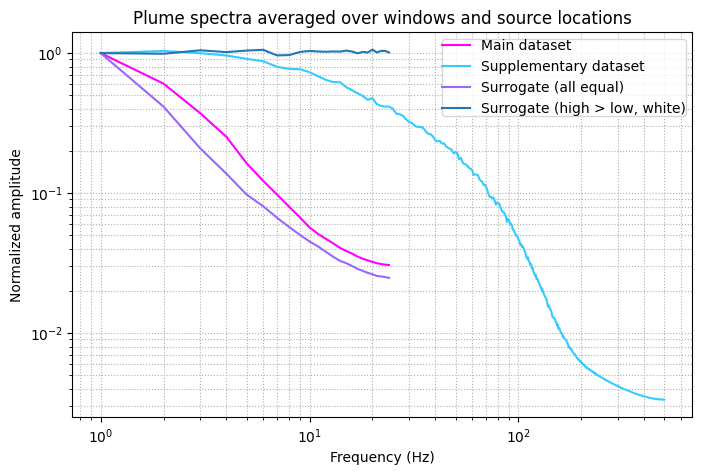

In [31]:
figure(figsize=(8,5))
for k, F in sorted(data_wnd.items()):
    if k == "su_high_pink": continue # Has the same spectrum as su.
    f = []
    for _, s in F.sims.items():
        fs = F.fs.to(UNITS.hertz).magnitude
        fr, ti, S = stft(s.data[:,iprb], fs = fs, window='boxcar',
                         nperseg=int(fs), noverlap=fs//2, boundary=None, padded=False)
        f.append(np.abs(S))
        
    f = np.array(f)
    a = np.mean(f,axis=-1).mean(axis=0)    
    loglog(fr[fr<fs/2][1:],a[fr<fs/2][1:]/a[1],
           label={"cr":"Supplementary dataset", "bw":"Main dataset", "su":"Surrogate (all equal)", "su_high_white":"Surrogate (high > low, white)", "su_high_pink":"Surrogate (high > low, pink)" }[k],
           color={"su_high_pink":"pink", "su_high_white":"C0", "su":cm.cool_r(0.4), "bw":cm.cool_r(0.0), "cr":cm.cool_r(0.8)}[k])
legend(borderpad=0)
xlabel("Frequency (Hz)")
ylabel("Normalized amplitude")
title("Plume spectra averaged over windows and source locations")
grid(True, which='both', linestyle=":")
file_name = f"{fig_dir}/spectra.pdf"
SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), flush(f"Wrote {file_name}."));

# The End